#**Importing Essential Libraries**

In [3]:

# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# DATA Preproccessing
from sklearn.model_selection import train_test_split, cross_validate,  cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler

# Metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, make_scorer


# Classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.neural_network import MLPClassifier

import time
from time import time
import warnings
warnings.filterwarnings("ignore")

Data Analysis and Machine Learning Libraries

This code block imports essential libraries for data analysis, preprocessing, and machine learning tasks. Let's break it down:

Data Analysis Libraries
- `pandas` (as `pd`): For data manipulation and analysis
- `numpy` (as `np`): For numerical operations
- `matplotlib.pyplot` (as `plt`): For creating static, animated, and interactive visualizations
- `seaborn` (as `sns`): For statistical data visualization

Data Preprocessing
- `train_test_split`: To split datasets into random train and test subsets
- `cross_validate`, `cross_val_score`: For cross-validation
- `GridSearchCV`: For hyperparameter tuning
- `StandardScaler`: For feature scaling

 Metrics
- `confusion_matrix`, `classification_report`, `roc_auc_score`: For model evaluation
- `accuracy_score`: To compute the accuracy of a model
- `make_scorer`: To make a scorer from a performance metric or loss function

 Classifiers
Various classification algorithms are imported:
- Random Forest
- Logistic Regression
- Support Vector Machine (SVM)
- Decision Tree
- K-Nearest Neighbors (KNN)
- Naive Bayes
- Gradient Boosting
- AdaBoost
- Bagging Classifier
- Multi-layer Perceptron (Neural Network)

 Utilities
- `time`: For timing operations
- `warnings`: To ignore warnings (used here to suppress all warnings)


**LOAD THE DATASET**

In [5]:

import pandas as pd

import kagglehub

# Download latest version
path = kagglehub.dataset_download("johnsmith88/heart-disease-dataset")

print("Path to dataset files:", path)

df = pd.read_csv(path + '/heart.csv')

Path to dataset files: /Users/shivamsharma/.cache/kagglehub/datasets/johnsmith88/heart-disease-dataset/versions/2


#**Exploratory Data Analysis (EDA) of Heart Disease Dataset**




Here i will perform a comprehensive exploratory data analysis on the heart disease dataset. Our goal is to understand the data structure, identify patterns, and uncover insights that will be valuable for further analysis and modeling.

###**UNDERSTANDING THE DATA SET**


 Attributes Information

- **Age**: Age of the patient  
- **Sex**: Sex of the patient  
- **cp**: Chest Pain type  
  - Value 1: Typical angina  
  - Value 2: Atypical angina  
  - Value 3: Non-anginal pain  
  - Value 4: Asymptomatic  
- **trtbps**: Resting blood pressure (in mm Hg)  
- **chol**: Cholesterol in mg/dl fetched via BMI sensor  
- **fbs**: Fasting blood sugar > 120 mg/dl  
  - 1 = True  
  - 0 = False  
- **rest_ecg**: Resting electrocardiographic results  
  - Value 0: Normal  
  - Value 1: Having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)  
  - Value 2: Showing probable or definite left ventricular hypertrophy by Estes' criteria  
- **thalach**: Maximum heart rate achieved  
- **exng**: Exercise induced angina  
  - 1 = Yes  
  - 0 = No  
- **oldpeak**: Previous peak  
- **slp**: Slope  
- **caaa**: Number of major vessels  
- **thall**: Thallium Stress Test result (0–3)  
- **target**:  
  - 0 = Less chance of heart attack  
  - 1 = More chance of heart attack  


In [6]:
# Rename columns for better readability
df.columns = ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'NumMajorVessels', 'Thal', 'Target']

In [7]:
# @title
# Display the first five rows of the dataset
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,NumMajorVessels,Thal,Target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [8]:
# Checking basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              1025 non-null   int64  
 1   Sex              1025 non-null   int64  
 2   ChestPainType    1025 non-null   int64  
 3   RestingBP        1025 non-null   int64  
 4   Cholesterol      1025 non-null   int64  
 5   FastingBS        1025 non-null   int64  
 6   RestingECG       1025 non-null   int64  
 7   MaxHR            1025 non-null   int64  
 8   ExerciseAngina   1025 non-null   int64  
 9   Oldpeak          1025 non-null   float64
 10  ST_Slope         1025 non-null   int64  
 11  NumMajorVessels  1025 non-null   int64  
 12  Thal             1025 non-null   int64  
 13  Target           1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None


Explanation of `df.info()` Output

The `df.info()` method provides a summary of the DataFrame's structure and contents. Key details include:

1. **Rows and Columns**:  
   The dataset contains **1025 rows** and **14 columns**.

2. **Column Information**:  
   Each column's name, the number of non-null values, and its data type are displayed.  
   - All columns have **1025 non-null values**, meaning there are no missing values.  
   - Data types:
     - **13 columns** are integers (`int64`), such as `Age` and `Sex`.  
     - **1 column** is a floating-point number (`float64`), which is `Oldpeak`.

3. **Memory Usage**:  
   The DataFrame occupies **112.2 KB** in memory.

This summary helps identify the structure of the dataset, the presence of missing data, and the data types for analysis.


In [9]:
# Displaying summary statistics of numerical features
print(df.describe())

               Age          Sex  ChestPainType    RestingBP  Cholesterol  \
count  1025.000000  1025.000000    1025.000000  1025.000000   1025.00000   
mean     54.434146     0.695610       0.942439   131.611707    246.00000   
std       9.072290     0.460373       1.029641    17.516718     51.59251   
min      29.000000     0.000000       0.000000    94.000000    126.00000   
25%      48.000000     0.000000       0.000000   120.000000    211.00000   
50%      56.000000     1.000000       1.000000   130.000000    240.00000   
75%      61.000000     1.000000       2.000000   140.000000    275.00000   
max      77.000000     1.000000       3.000000   200.000000    564.00000   

         FastingBS   RestingECG        MaxHR  ExerciseAngina      Oldpeak  \
count  1025.000000  1025.000000  1025.000000     1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146        0.336585     1.071512   
std       0.356527     0.527878    23.005724        0.472772     1.175053   
min    

 Insights from the Dataset:
- **Age**: The dataset includes patients aged 29–77 years, with a median of 56.  
- **Cholesterol**: Cholesterol values range from 126 to 564 mg/dl, with an average of 246 mg/dl.  
- **MaxHR (Maximum Heart Rate)**: The maximum heart rate ranges from 71 to 202, with an average of 149.11.  
- **FastingBS (Fasting Blood Sugar)**: Most patients have fasting blood sugar levels ≤ 120 mg/dl (mean = 0.15).  
- **Target**: The target column is binary (0 or 1), representing the likelihood of a heart attack. The dataset is approximately balanced, with a mean of 0.51.  

In [10]:
# Checking for missing values
print(df.isnull().sum())

# Checking for zero values in Cholesterol
print("Number of zero Cholesterol values:", (df['Cholesterol'] == 0).sum())

Age                0
Sex                0
ChestPainType      0
RestingBP          0
Cholesterol        0
FastingBS          0
RestingECG         0
MaxHR              0
ExerciseAngina     0
Oldpeak            0
ST_Slope           0
NumMajorVessels    0
Thal               0
Target             0
dtype: int64
Number of zero Cholesterol values: 0


Data Quality Check
- There are no missing values in the dataset.

In [11]:
# @title
#Number of Unique Values
df.nunique()

Age                 41
Sex                  2
ChestPainType        4
RestingBP           49
Cholesterol        152
FastingBS            2
RestingECG           3
MaxHR               91
ExerciseAngina       2
Oldpeak             40
ST_Slope             3
NumMajorVessels      5
Thal                 4
Target               2
dtype: int64

 Unique Value Analysis

The code `df.nunique()` counts the number of unique values in each column of the DataFrame. Here's a brief explanation of the output:

- **Categorical Variables**:
  - `Sex`, `FastingBS`, `ExerciseAngina`, and `Target` have 2 unique values each, indicating binary features.
  - `ChestPainType`, `RestingECG`, `ST_Slope`, and `Thal` have 3-4 unique values, suggesting categorical variables with limited options.

- **Numerical Variables**:
  - `Age` has 41 unique values, representing different ages in the dataset.
  - `RestingBP`, `Cholesterol`, and `MaxHR` have many unique values (49-152), indicating continuous numerical data.
  - `Oldpeak` has 40 unique values, suggesting a more granular numerical measurement.

- **Special Cases**:
  - `NumMajorVessels` has 5 unique values, likely representing a count from 0 to 4.


## DESCRIBING THE DATASET

In [12]:
# Describe the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
Sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
ChestPainType,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
RestingBP,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
Cholesterol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
FastingBS,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
RestingECG,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
MaxHR,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
ExerciseAngina,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
Oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


 Key Insights:

- **Age**: The age ranges from 29 to 77, with an average of 54.43 years.
- **Sex**: Majority of the individuals are male (0 represents female, 1 represents male).
- **ChestPainType**: Most individuals have chest pain type 1 or 2, with a few categorized under type 3.
- **RestingBP**: The average resting blood pressure is 131.6 mm Hg, with a range from 94 to 200.
- **Cholesterol**: Average cholesterol level is 246, ranging from 126 to 564.
- **FastingBS**: Only about 15% of individuals have a fasting blood sugar level greater than 120 mg/dl (value 1).
- **RestingECG**: Majority of individuals have resting electrocardiogram results of 1 or 0.
- **MaxHR**: The maximum heart rate ranges from 71 to 202, with an average of 149.11.
- **ExerciseAngina**: Around 34% of individuals experience exercise-induced angina (value 1).
- **Oldpeak**: The depression induced by exercise, represented by Oldpeak, ranges from 0 to 6.2, with an average of 1.07.
- **ST_Slope**: Most individuals have an ST slope of 1 or 2.
- **NumMajorVessels**: On average, individuals have 0.75 major vessels, with a maximum of 4.
- **Thal**: The majority of individuals are classified with a Thal value of 2 or 3.
- **Target**: The target variable is binary, with approximately 51% of individuals having a positive outcome (1).


## **VISUALIZING THE DATA**

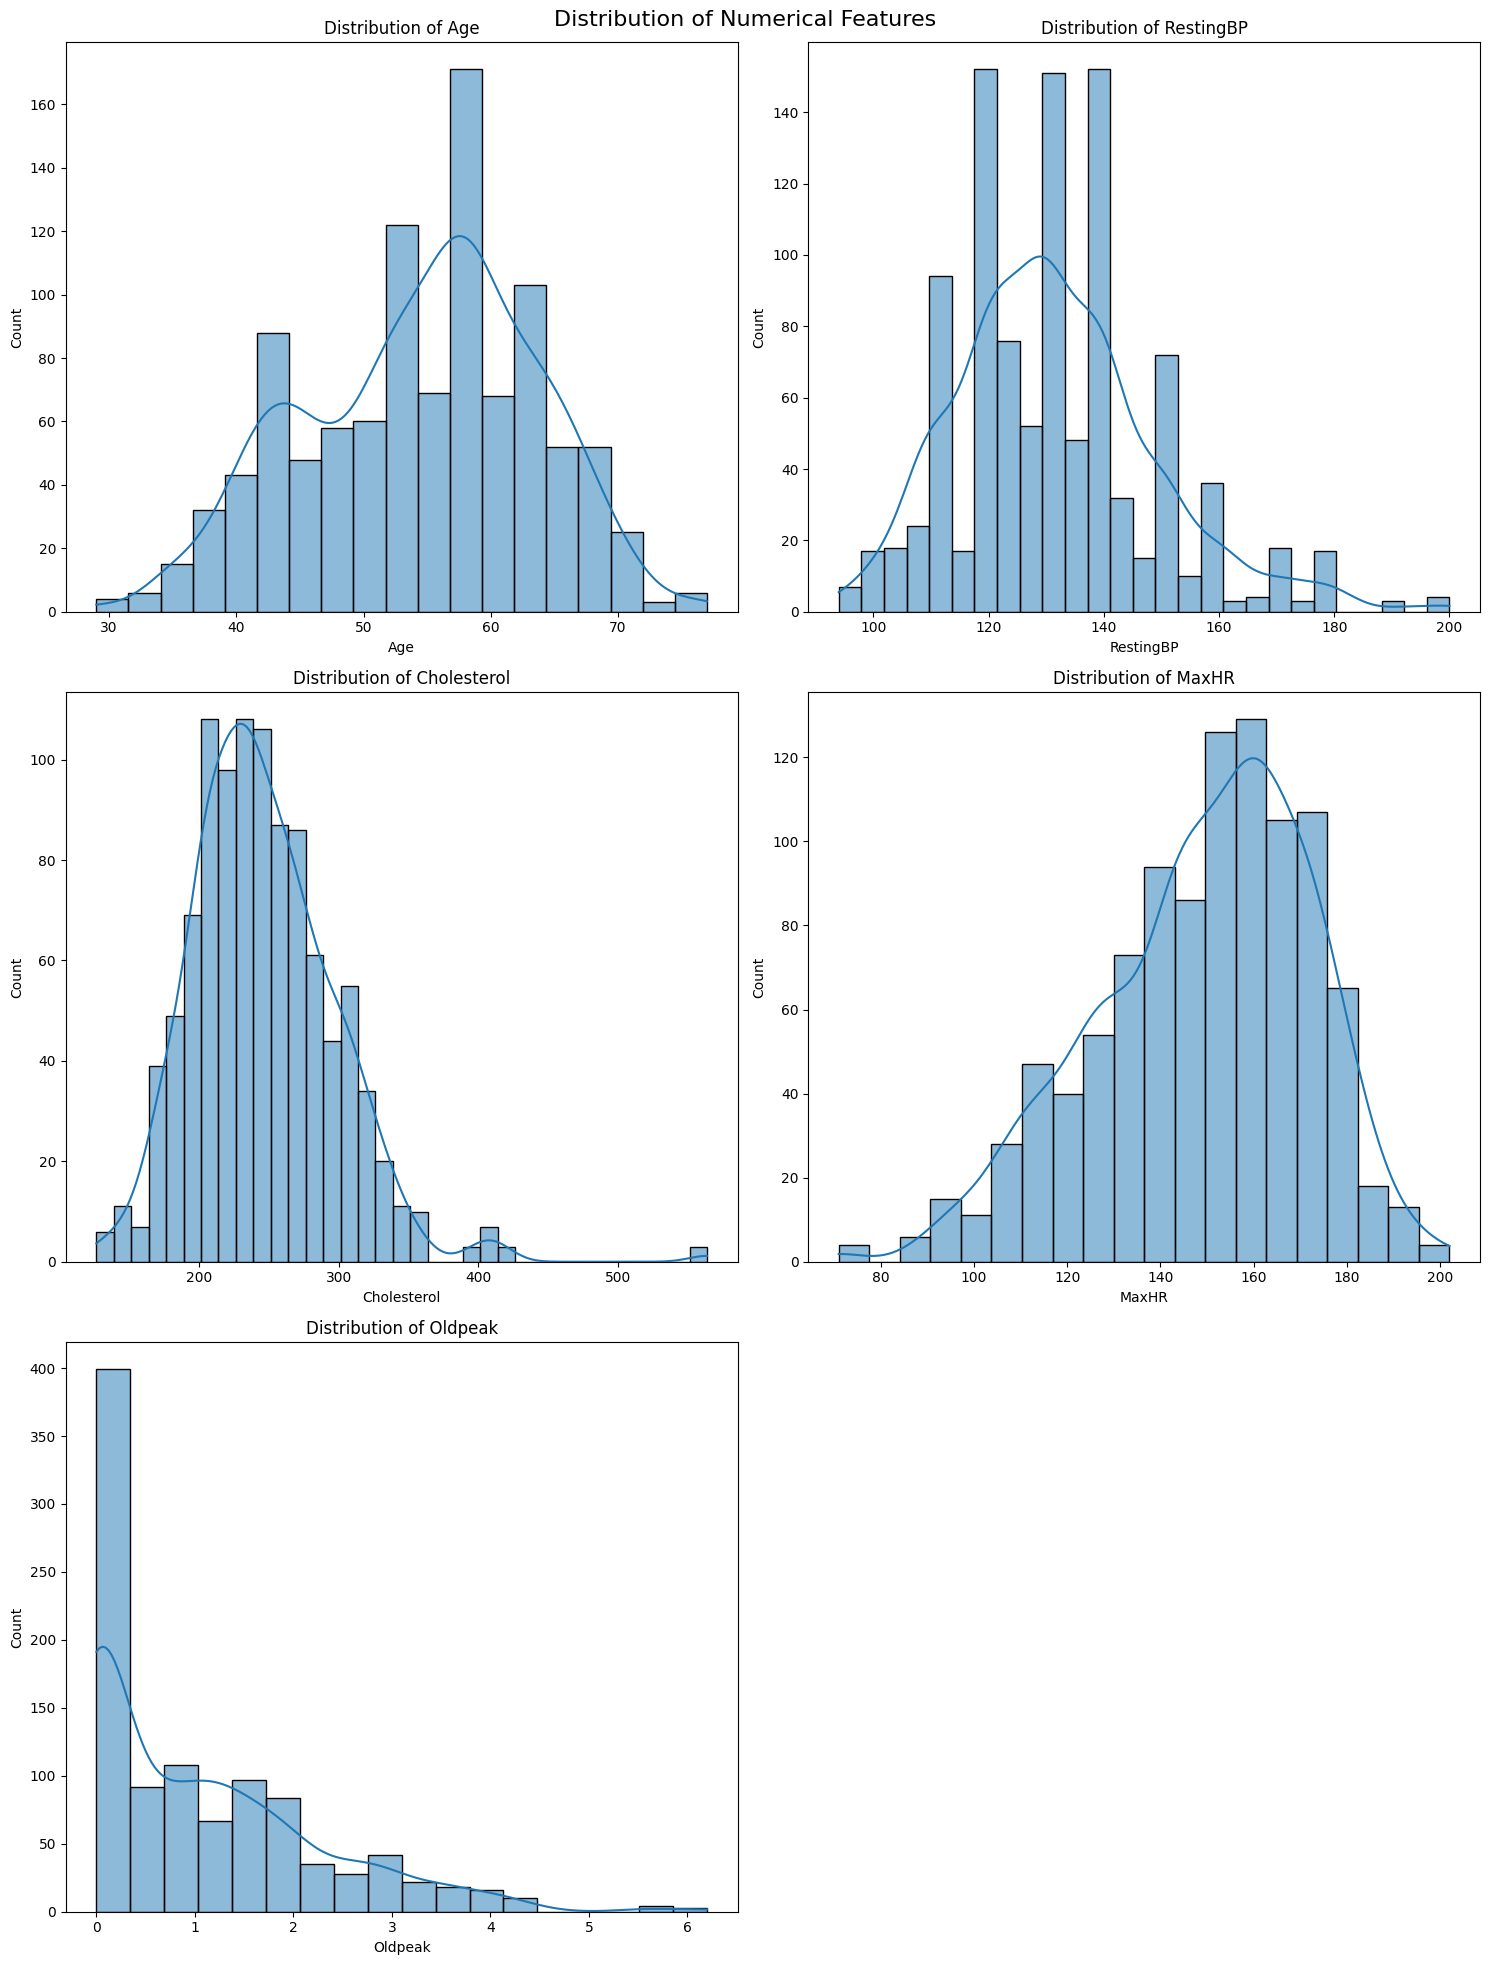

In [13]:
# Select numerical features
numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

# Set up the plot
fig, axes = plt.subplots(3, 2, figsize=(15, 20))
fig.suptitle('Distribution of Numerical Features', fontsize=16)

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot histograms with KDE for each numerical feature
for i, feature in enumerate(numerical_features):
    sns.histplot(df[feature], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')

# Remove the last empty subplot
fig.delaxes(axes[-1])

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()


Distribution Analysis of Numerical Features

The plots show the distribution patterns of key numerical features in the heart disease dataset:

**Age Distribution**
- Bell-shaped distribution centered around 55-60 years
- Most patients are between 40-70 years old
- Few patients younger than 35 or older than 70

**Resting Blood Pressure (RestingBP)**
- Right-skewed distribution
- Most common readings between 120-140 mm Hg
- Some outliers above 180 mm Hg

**Cholesterol Levels**
- Roughly normal distribution
- Centered around 200-300 mg/dl
- Notable outliers above 400 mg/dl

**Maximum Heart Rate (MaxHR)**
- Approximately normal distribution
- Most values between 140-180 bpm
- Fairly symmetric with slight left skew

**Oldpeak (ST Depression)**
- Highly right-skewed distribution
- Majority of values between 0-2
- Long tail extending to 6



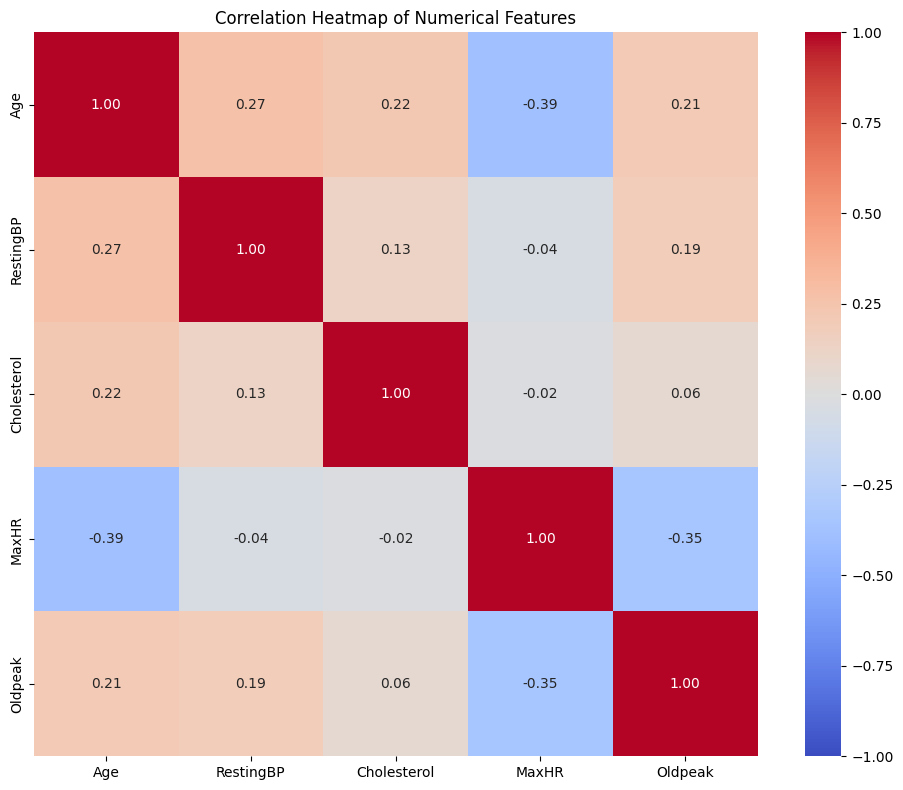

In [14]:
# Select numerical features
numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

# Calculate correlation matrix
correlation_matrix = df[numerical_features].corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix,
            annot=True,              # Show correlation values
            cmap='coolwarm',         # Color scheme
            vmin=-1,                 # Minimum correlation value
            vmax=1,                  # Maximum correlation value
            center=0,                # Center point of colormap
            square=True,             # Make cells square
            fmt='.2f')               # Format correlation values to 2 decimal places

plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

 Correlation Heatmap Analysis

The correlation heatmap reveals important relationships between numerical features in the heart disease dataset:

**Strong Negative Correlations:**
- Age and MaxHR (Maximum Heart Rate): -0.39, indicating that maximum heart rate tends to decrease with age
- MaxHR and Oldpeak: -0.35, showing inverse relationship between maximum heart rate and ST depression

**Moderate Positive Correlations:**
- Age and RestingBP: 0.27, suggesting blood pressure tends to increase slightly with age
- Age and Cholesterol: 0.22, indicating a weak tendency for cholesterol to increase with age

**Weak/No Correlations:**
- Cholesterol shows minimal correlation with most other features (all < 0.15)
- RestingBP and MaxHR show almost no correlation (-0.04)

The heatmap uses a coolwarm color scheme where:
- Red indicates positive correlations
- Blue indicates negative correlations
- Darker colors represent stronger correlations
- White/pale colors represent weak or no correlation

<Figure size 1600x2000 with 0 Axes>

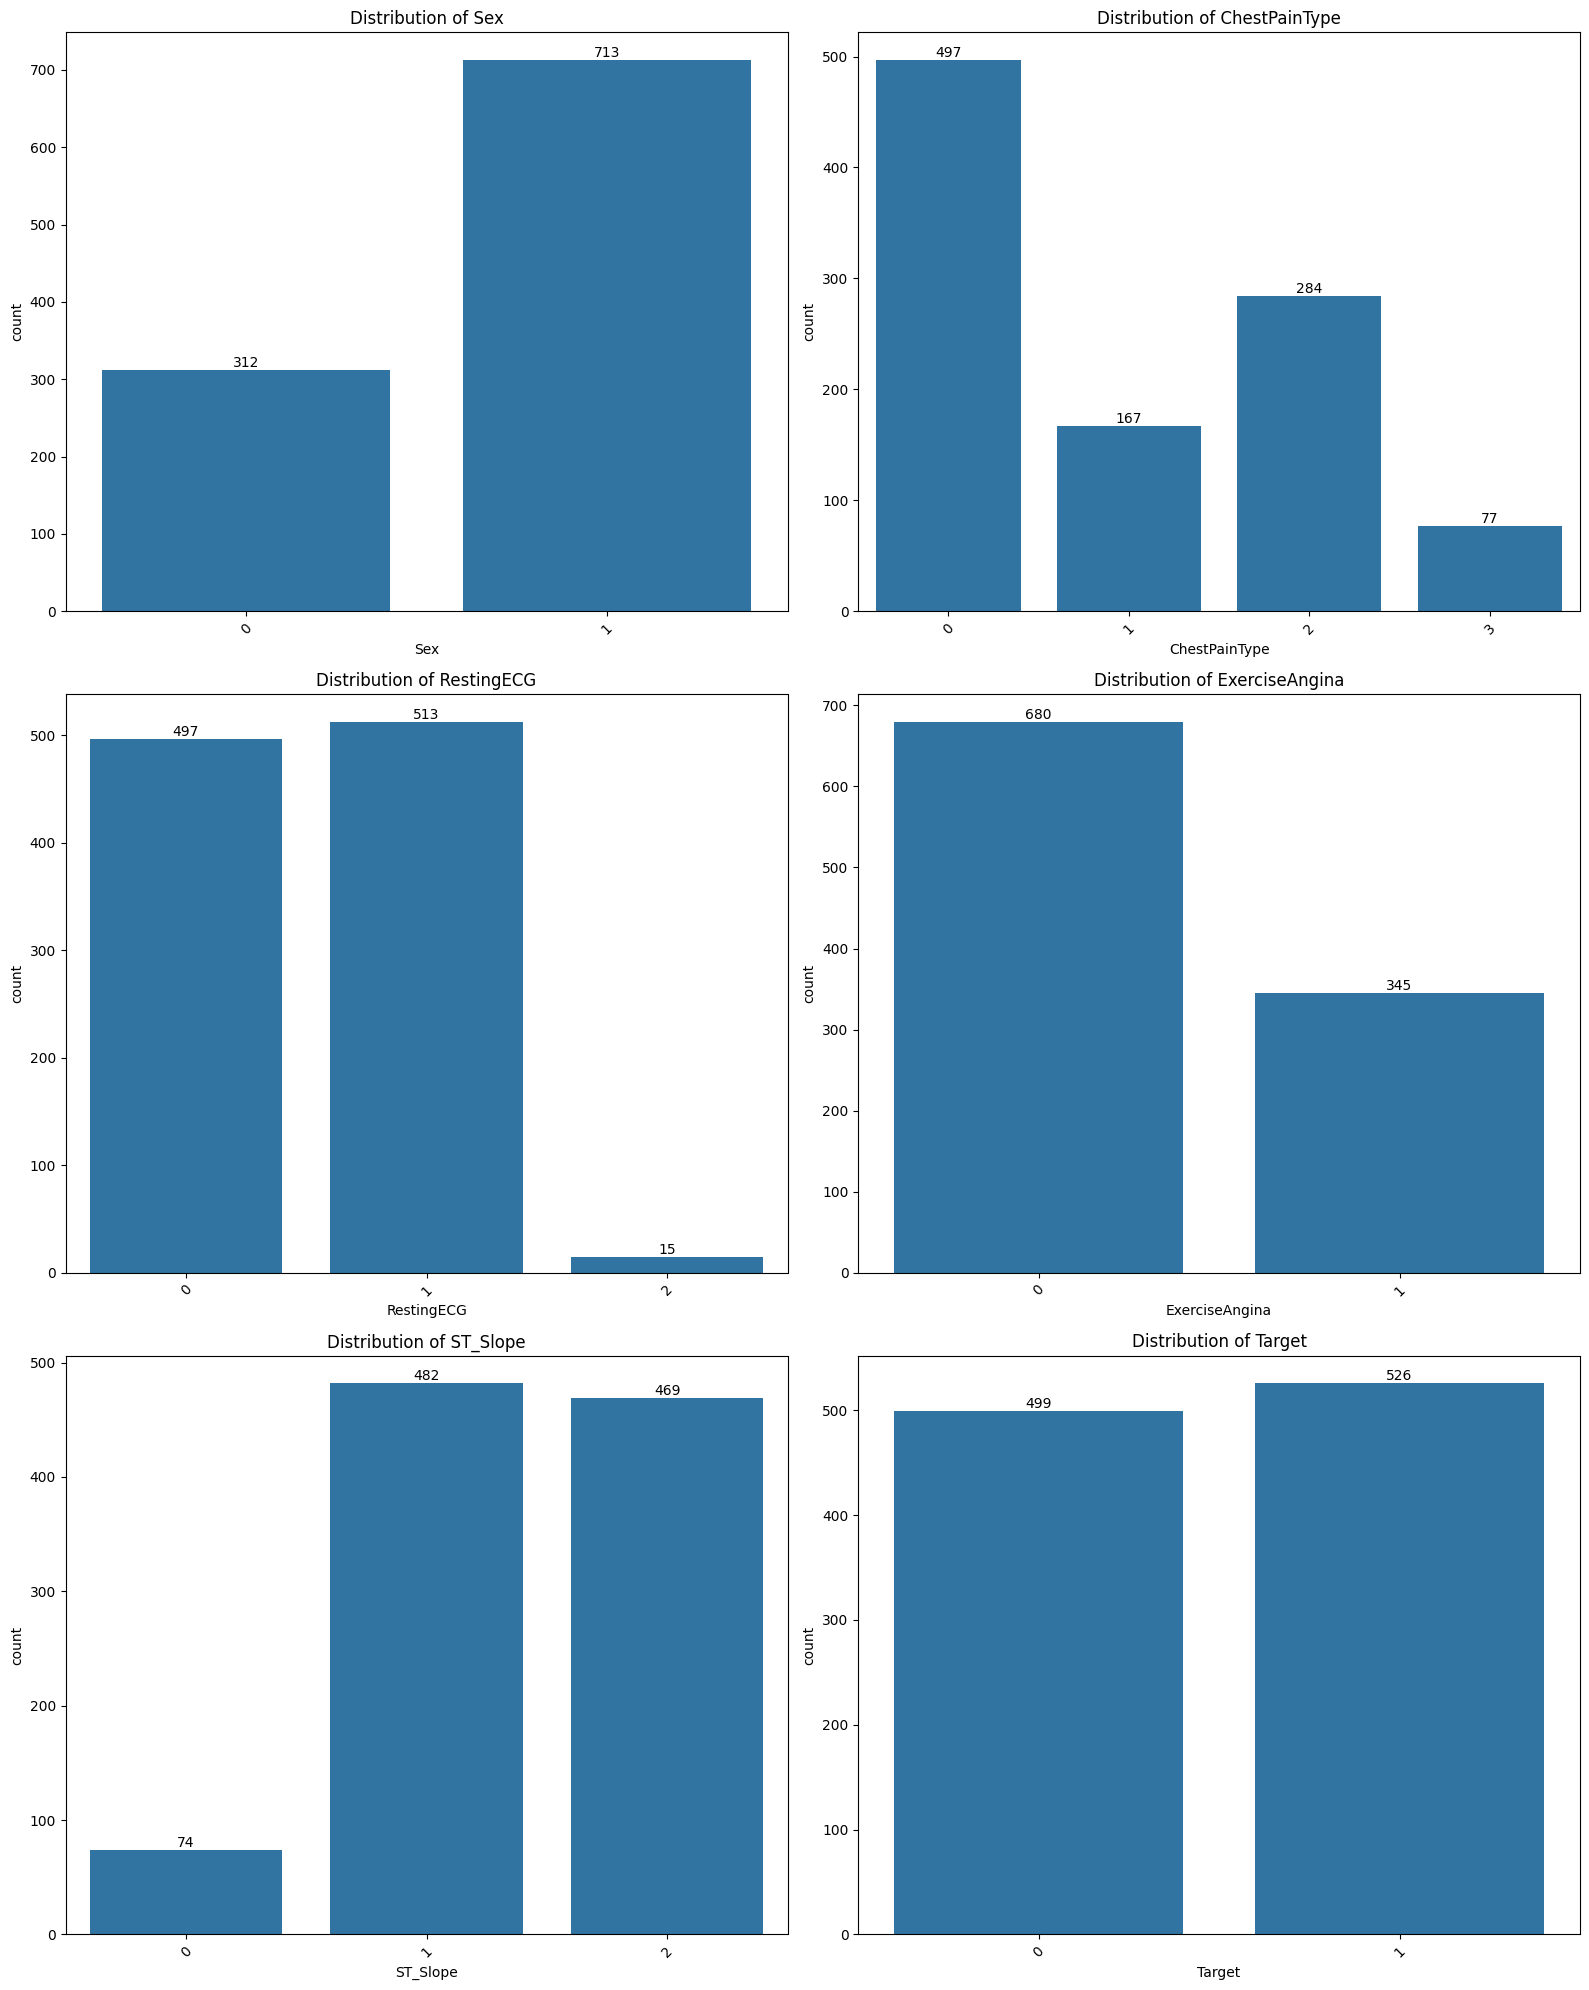

In [15]:
# Define categorical features
categorical_features = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'Target']

# Create subplots for categorical features
plt.figure(figsize=(16, 20))
fig, axes = plt.subplots(3, 2, figsize=(16, 20))
axes = axes.ravel()

# Plot distribution for each categorical feature
for i, col in enumerate(categorical_features):
    sns.countplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].tick_params(axis='x', rotation=45)

    # Add count labels on top of each bar
    for p in axes[i].patches:
        axes[i].annotate(f'{int(p.get_height())}',
                        (p.get_x() + p.get_width()/2., p.get_height()),
                        ha='center', va='bottom')

# Adjust layout and display plot
plt.tight_layout()
plt.show()

 Distribution Analysis of Categorical Features

The visualization shows six bar plots displaying the distribution of categorical variables in the heart disease dataset:

**Sex Distribution**
- Male (1): 713 patients
- Female (0): 312 patients
- Shows significant gender imbalance in the dataset

**Chest Pain Type**
- Four types (0-3) with varying frequencies
- Type 0: 497 cases (most common)
- Type 2: 284 cases
- Type 1: 167 cases
- Type 3: 77 cases (least common)

**Resting ECG**
- Three categories with:
- Type 1: 513 cases
- Type 0: 497 cases
- Type 2: 15 cases (rare)

**Exercise Angina**
- Binary distribution:
- No (0): 680 cases
- Yes (1): 345 cases

**ST Slope**
- Three categories:
- Type 1: 482 cases
- Type 2: 469 cases
- Type 0: 74 cases

**Target (Heart Disease)**
- Nearly balanced distribution:
- Present (1): 526 cases
- Absent (0): 499 cases


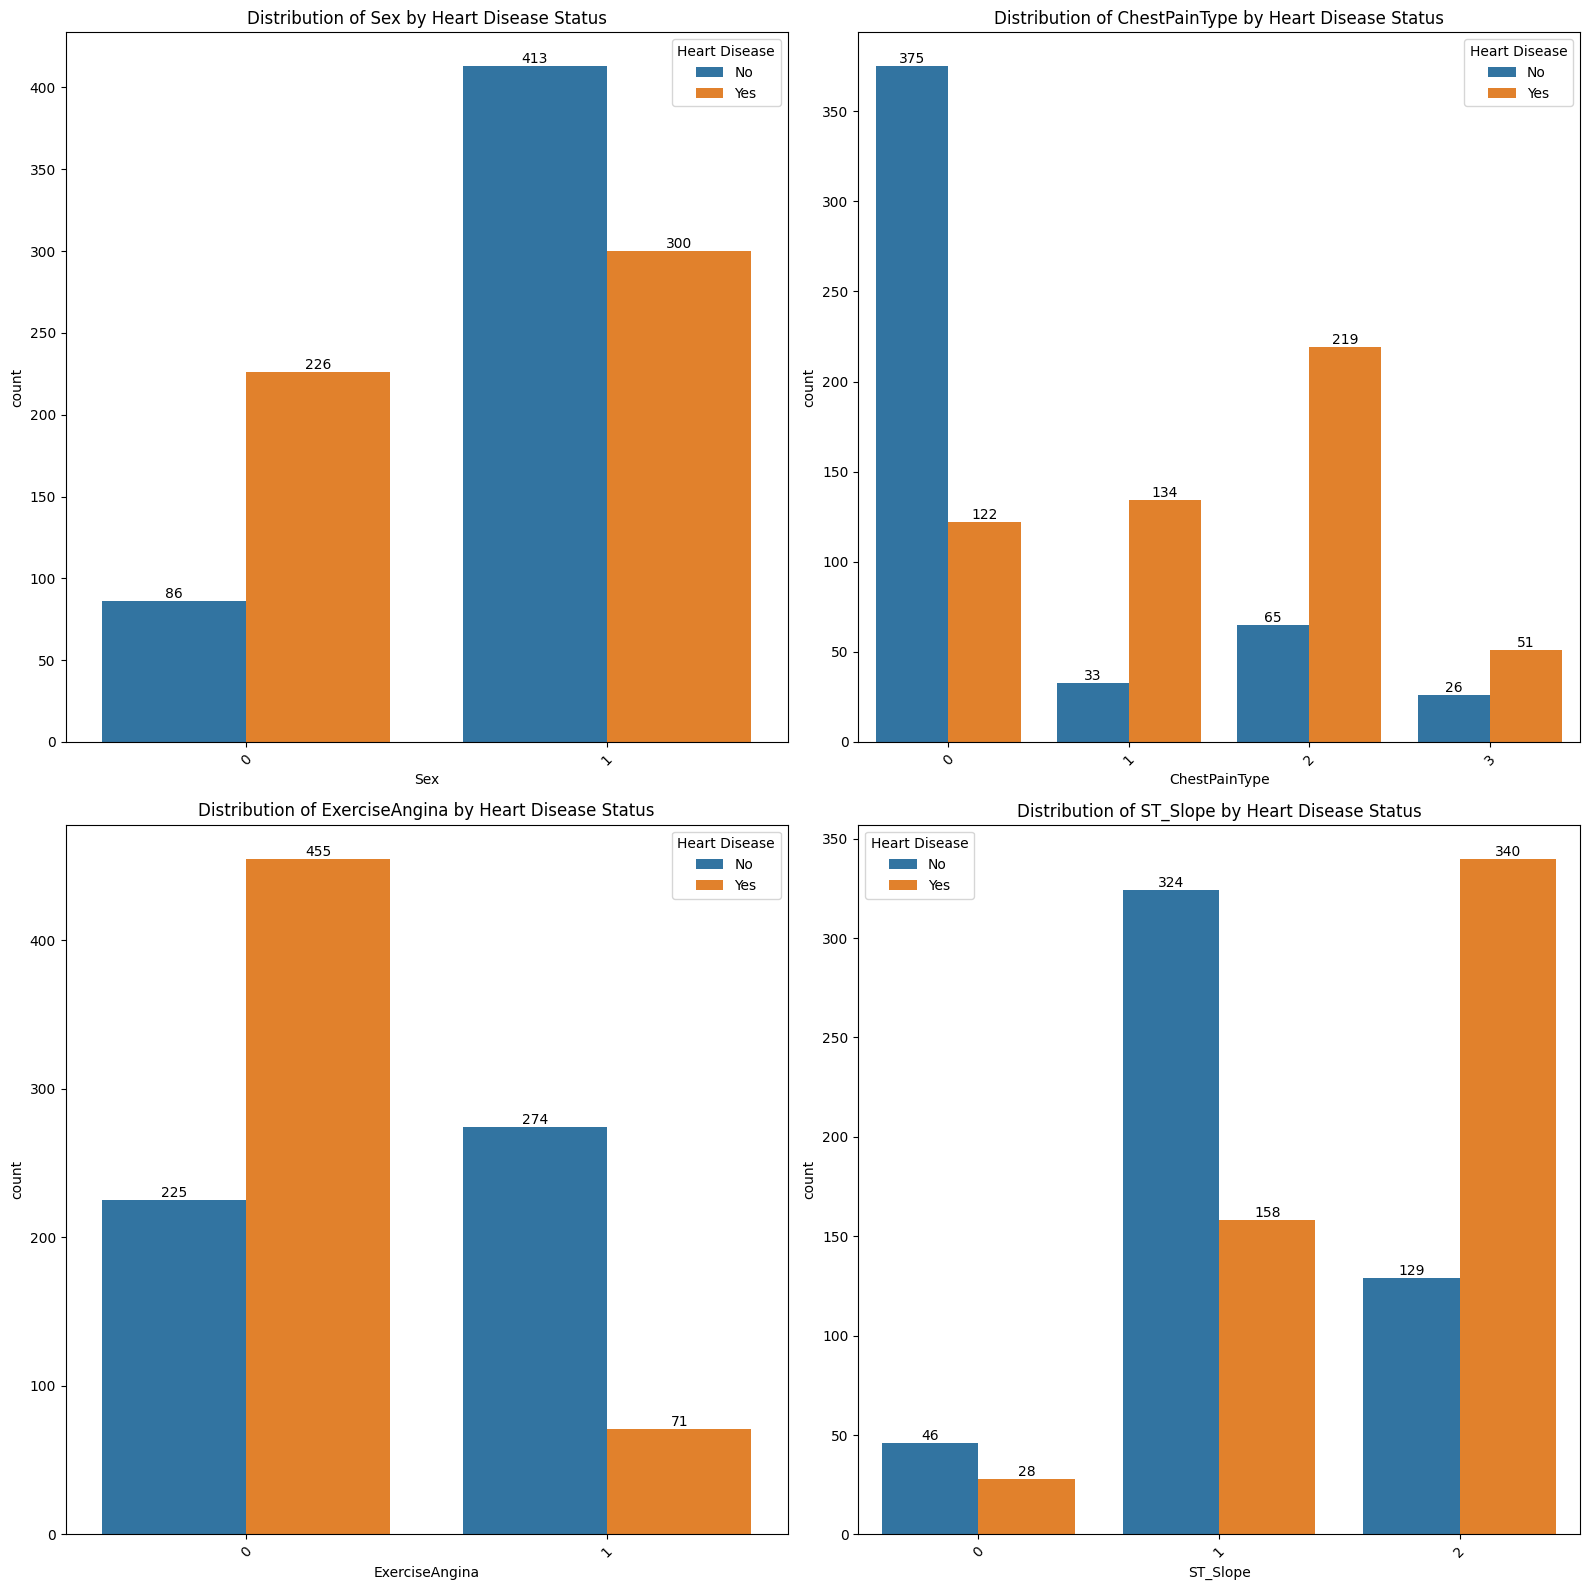

In [16]:
# Create subplots to analyze categorical features vs Target
fig, axes = plt.subplots(2, 2, figsize=(16, 16))
axes = axes.ravel()

# Select categorical features to analyze
categorical_vars = ['Sex', 'ChestPainType', 'ExerciseAngina', 'ST_Slope']

# Create countplots for each categorical feature
for i, feature in enumerate(categorical_vars):
    sns.countplot(data=df,
                 x=feature,
                 hue='Target',
                 ax=axes[i])

    # Customize each subplot
    axes[i].set_title(f'Distribution of {feature} by Heart Disease Status')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].legend(title='Heart Disease', labels=['No', 'Yes'])

    # Add count labels on top of each bar
    for container in axes[i].containers:
        axes[i].bar_label(container)

# Adjust layout and display plot
plt.tight_layout()
plt.show()

 Analysis of Categorical Features vs Heart Disease

**Sex Distribution and Heart Disease**
- Males (1) show higher heart disease prevalence (300 cases) compared to females
- Females (0) have lower representation but higher disease proportion (226 out of 312)
- Clear gender disparity in the dataset

**Chest Pain Type Analysis**
- Type 0: Highest count (375) but lower disease rate
- Type 2: Strong indicator of heart disease (219 positive cases)
- Type 1: Higher proportion of positive cases (134 out of 167)
- Type 3: Lowest frequency but balanced distribution

**Exercise Angina Relationship**
- Strong predictor of heart disease
- Presence of exercise angina (1): High correlation with heart disease (455 cases)
- Absence (0): Lower disease prevalence (225 out of 499)

**ST Slope Patterns**
- Type 2: Strong association with heart disease (340 positive cases)
- Type 1: More balanced distribution (158 positive, 324 negative)
- Type 0: Lowest frequency with balanced distribution

**Key Insights**
- Exercise Angina and ST Slope appear to be strong predictors of heart disease
- Chest Pain Type 2 shows significant correlation with heart disease
- Gender differences exist in heart disease prevalence

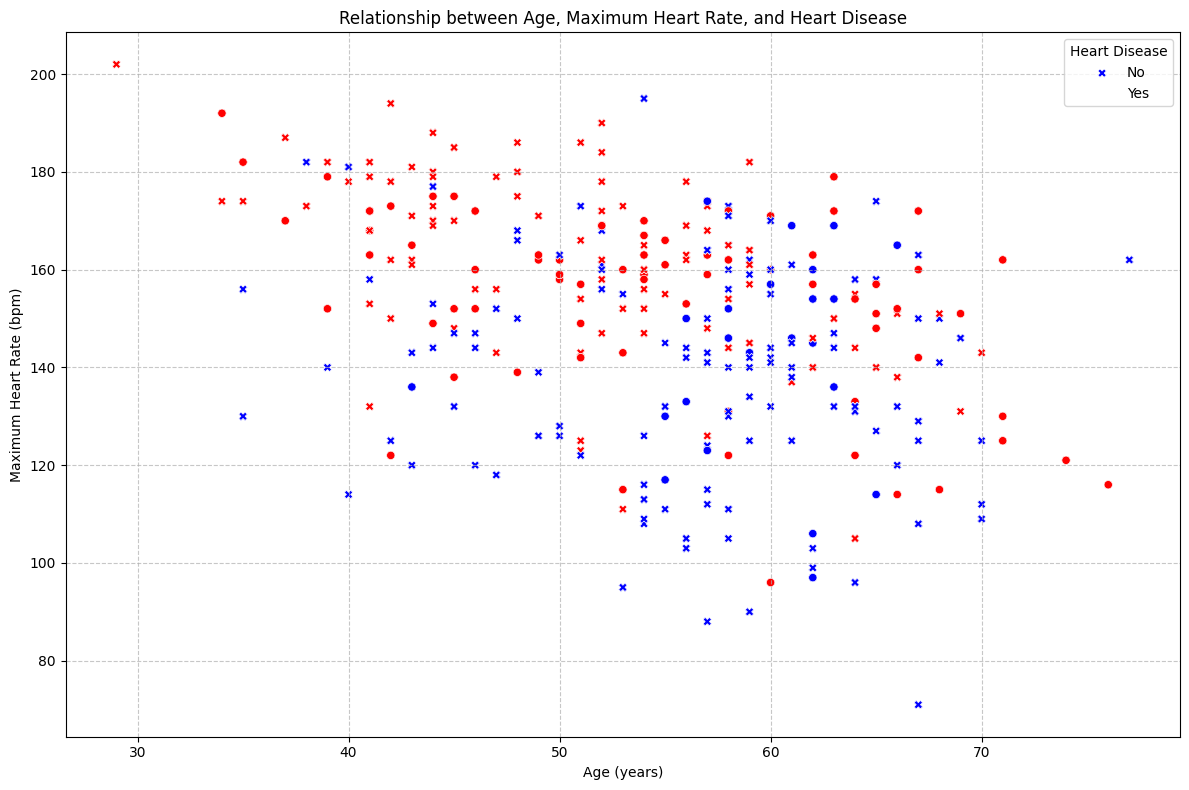

In [17]:
# Create scatter plot to analyze Age vs MaxHR relationship
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df,
                x='Age',
                y='MaxHR',
                hue='Target',
                style='Sex',
                palette=['blue', 'red'])

# Customize the plot
plt.title('Relationship between Age, Maximum Heart Rate, and Heart Disease')
plt.xlabel('Age (years)')
plt.ylabel('Maximum Heart Rate (bpm)')

# Customize legend
plt.legend(title='Heart Disease', labels=['No', 'Yes'])

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Adjust layout and display plot
plt.tight_layout()
plt.show()

Analysis of Age vs Maximum Heart Rate Relationship

**Key Observations**

**Age and Heart Rate Correlation**
- Clear negative correlation between age and maximum heart rate
- Maximum heart rates decrease as age increases
- Younger patients (30-40 years) show higher heart rates (160-200 bpm)
- Older patients (60-70 years) typically show lower heart rates (100-140 bpm)

**Heart Disease Distribution**
- Blue markers (No Heart Disease) tend to cluster in higher heart rate regions
- Red markers (Heart Disease) more prevalent in lower heart rate regions
- Higher concentration of heart disease cases in middle to older age groups
- Younger patients with high heart rates show lower disease prevalence

**Age-Specific Patterns**
- Ages 30-40: Heart rates typically range 160-200 bpm
- Ages 40-50: Heart rates spread between 140-180 bpm
- Ages 50-60: Heart rates mostly between 120-160 bpm
- Ages 60-70: Heart rates commonly below 140 bpm

**Clinical Implications**
- Lower maximum heart rate appears to be associated with higher heart disease risk
- Age is a significant factor in both heart rate and disease risk
- The relationship between age and heart rate follows an expected physiological pattern

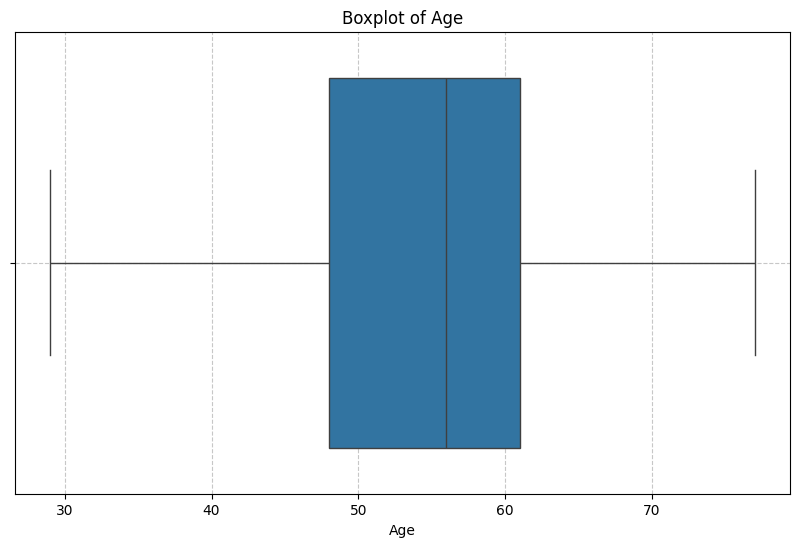

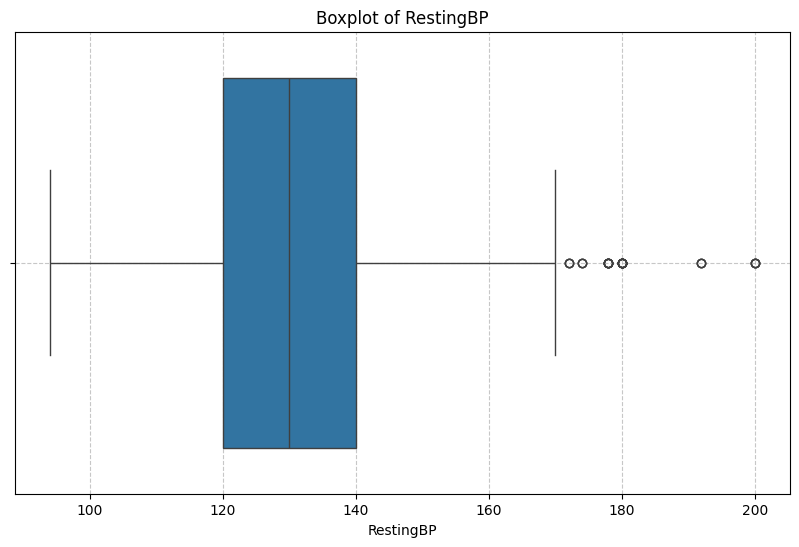

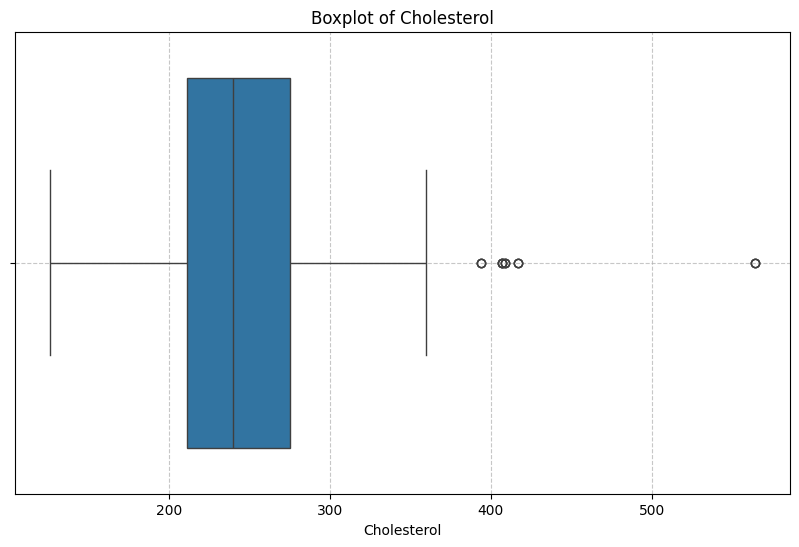

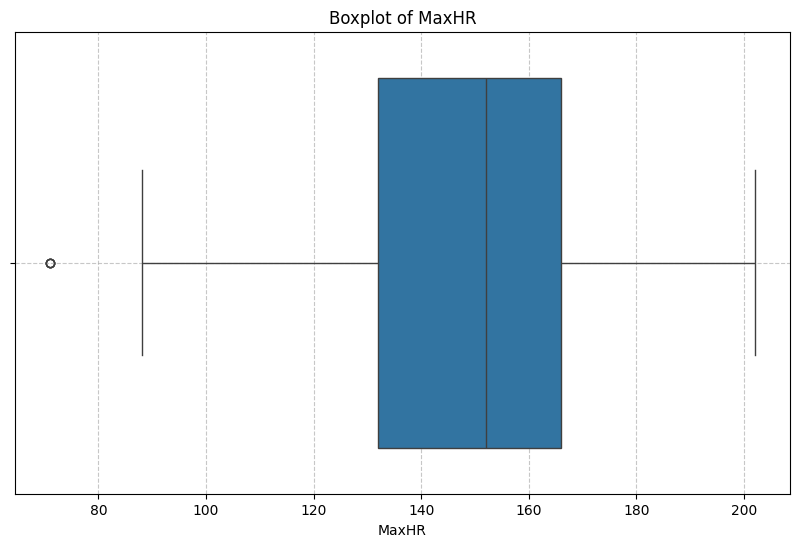

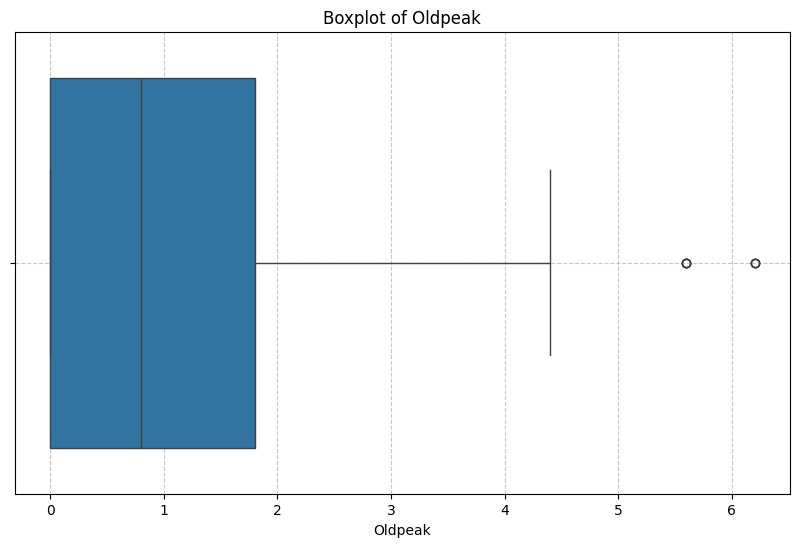

In [18]:
# Function to create boxplots for numerical features
def plot_boxplot(data, col):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

# Define numerical features
numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

# Generate boxplots for each numerical feature
for col in numerical_features:
    plot_boxplot(df, col)

Boxplot Analysis of Numerical Features

**Age Distribution**
- Median age around 55 years
- IQR approximately between 48-62 years
- Relatively symmetric distribution
- Few outliers at both extremes (30 and 75 years)

**Cholesterol Levels**
- Median around 250 mg/dl
- Most values between 200-300 mg/dl
- Several high outliers above 400 mg/dl
- One extreme outlier near 550 mg/dl

**Resting Blood Pressure (RestingBP)**
- Median approximately 130 mmHg
- IQR between 120-140 mmHg
- Multiple outliers above 160 mmHg
- Few extreme cases near 200 mmHg

**Oldpeak (ST Depression)**
- Heavily right-skewed distribution
- Median around 1.0
- Majority of values between 0-2
- Several outliers above 4
- Two extreme outliers at 5 and 6



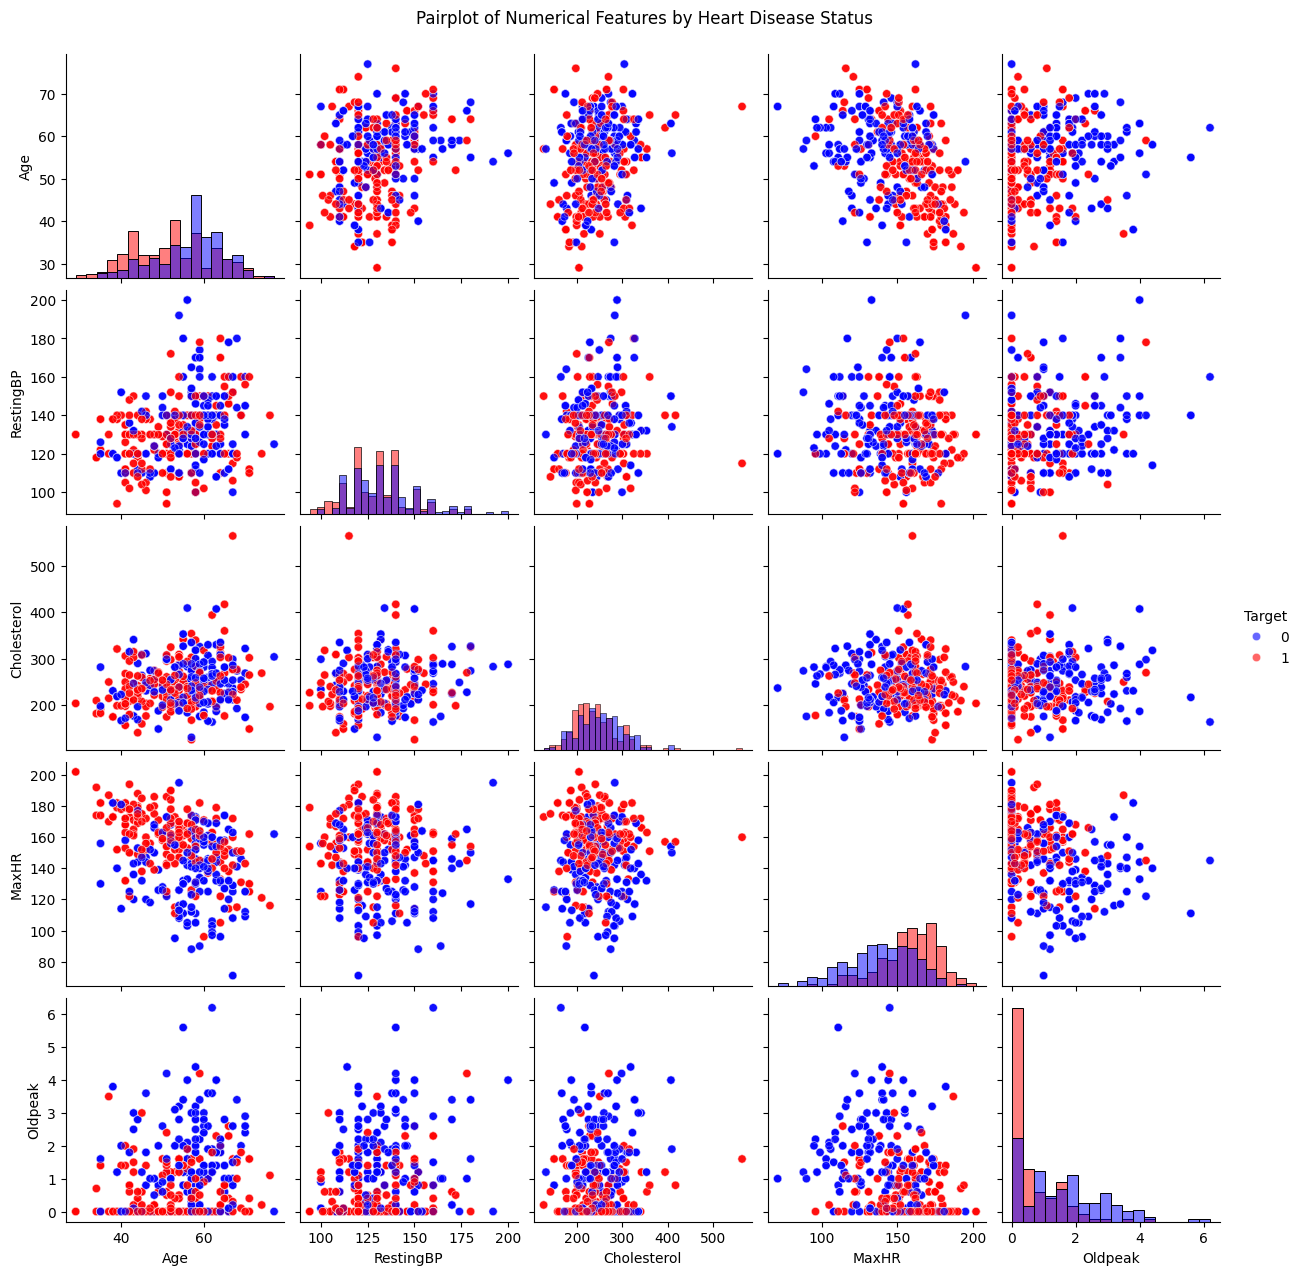

In [19]:
# Create pairplot for numerical features
numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

# Create pairplot with updated styling
sns.pairplot(data=df[numerical_features + ['Target']],
             hue='Target',
             diag_kind='hist',
             plot_kws={'alpha': 0.6},
             palette=['blue', 'red'])

# Adjust the layout and title
plt.suptitle('Pairplot of Numerical Features by Heart Disease Status', y=1.02)

# Display the plot
plt.show()

**Key Feature Relationships**
- **Age vs MaxHR**: Strong negative correlation; older patients show lower maximum heart rates
- **Age vs Oldpeak**: Slight positive correlation; older patients tend to have higher ST depression
- **MaxHR vs Oldpeak**: Negative correlation; higher heart rates associated with lower ST depression

**Disease Distribution Patterns**
- Red dots (Heart Disease) cluster more in:
  - Higher age ranges
  - Lower MaxHR regions
  - Higher Oldpeak values
- Blue dots (No Heart Disease) concentrate in:
  - Lower age ranges
  - Higher MaxHR regions
  - Lower Oldpeak values

**Feature Distributions**
- Age shows normal distribution
- RestingBP shows right-skewed distribution
- Cholesterol appears normally distributed with outliers
- MaxHR shows slight left skew
- Oldpeak displays strong right skew

The pairplot reveals clear separation patterns between heart disease and non-heart disease cases across multiple feature combinations.

In [20]:
# # Create age groups and analyze heart disease distribution
# # Create age groups using pd.cut
# df['AgeGroup'] = pd.cut(df['Age'],
#                          bins=[0, 40, 50, 60, 70, 100],
#                          labels=['<40', '40-50', '50-60', '60-70', '70+'])

# # Create the plot
# plt.figure(figsize=(12, 6))
# sns.countplot(data=df,
#               x='AgeGroup',
#               hue='Target',
#               palette=['blue', 'red'])

# # Customize the plot
# plt.title('Distribution of Heart Disease Across Age Groups', pad=15)
# plt.xlabel('Age Group')
# plt.ylabel('Number of Patients')
# plt.legend(title='Heart Disease', labels=['No', 'Yes'])

# # Add value labels on top of each bar
# for container in plt.gca().containers:
#     plt.bar_label(container)

# # Add grid for better readability
# plt.grid(axis='y', linestyle='--', alpha=0.7)

# # Adjust layout and display
# plt.tight_layout()
# plt.show()


**Age Group Distribution**
- 50-60 years shows highest patient count (438 total: 234 without disease, 204 with disease)
- 40-50 years shows high disease prevalence (166 with disease vs 81 without)
- 60-70 years shows more cases without disease (158 without vs 94 with)
- <40 years has relatively few cases (23 without, 45 with disease)
- 70+ age group has lowest representation (3 without, 17 with disease)

**Key Insights**
- Middle age groups (40-60) show highest disease prevalence
- Disease risk appears to increase significantly after age 40
- Young adults (<40) have lower overall cases but higher proportion of disease
- Elderly (70+) show small sample size but high disease proportion
- Peak occurrence of heart disease is in the 50-60 age group

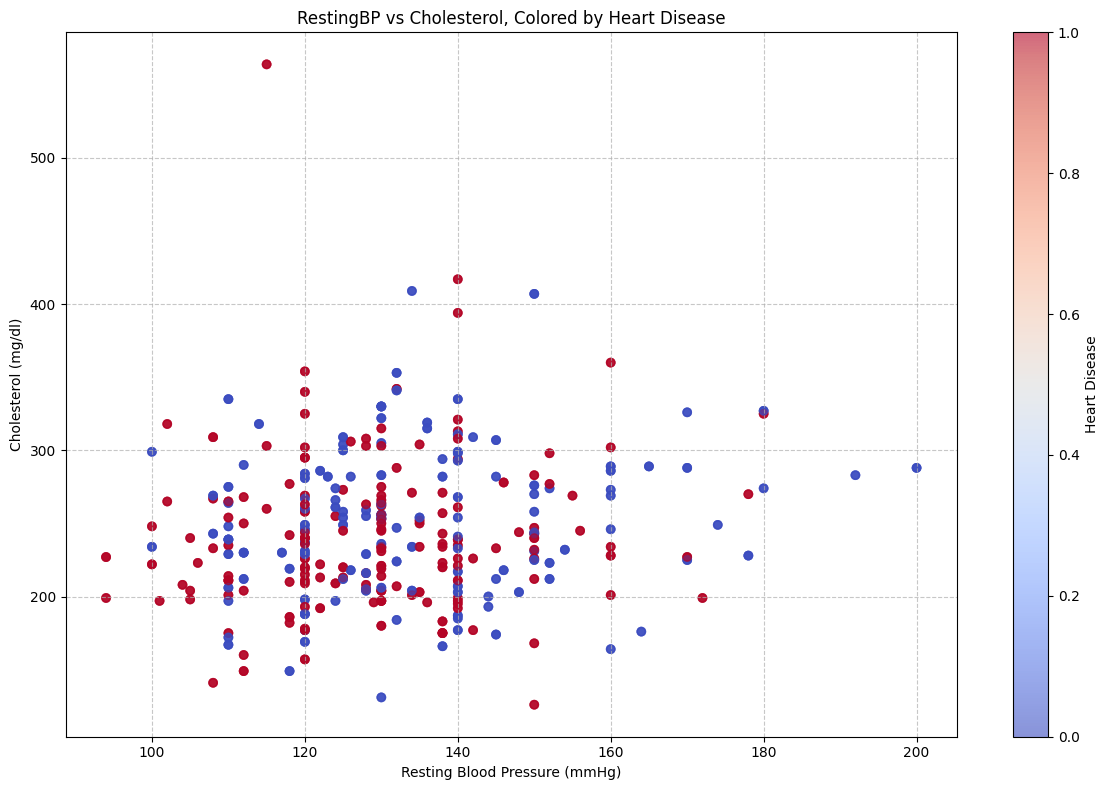

In [21]:
# Create scatter plot to analyze RestingBP vs Cholesterol relationship
plt.figure(figsize=(12, 8))

# Create scatter plot with updated column names
scatter = plt.scatter(df['RestingBP'],
                     df['Cholesterol'],
                     c=df['Target'],
                     cmap='coolwarm',
                     alpha=0.6)

# Customize the plot
plt.colorbar(scatter, label='Heart Disease')
plt.title('RestingBP vs Cholesterol, Colored by Heart Disease')
plt.xlabel('Resting Blood Pressure (mmHg)')
plt.ylabel('Cholesterol (mg/dl)')

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Adjust layout and display plot
plt.tight_layout()
plt.show()

Analysis of RestingBP vs Cholesterol Relationship

**Distribution Patterns**
- Most data points cluster between:
  - RestingBP: 120-160 mmHg
  - Cholesterol: 200-300 mg/dl

**Disease Patterns**
- No clear separation between heart disease (red) and no heart disease (blue) cases
- Both high and low cholesterol levels show mixed disease status
- Higher blood pressure regions (>160 mmHg) show slightly more heart disease cases

**Outliers**
- Several notable outliers:
  - High cholesterol (>400 mg/dl) with varying blood pressure levels
  - High blood pressure (>180 mmHg) with normal cholesterol levels
  - One extreme case with cholesterol >500 mg/dl

**Clinical Implications**
- No strong linear relationship between RestingBP and Cholesterol
- Disease risk appears to be influenced by factors beyond just these two measurements

##DESCRIPTIVE ANALYSIS

In [22]:
# Calculate descriptive statistics for numeric columns
numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
numeric_stats = df[numerical_features].describe()

# Calculate mode for categorical columns
categorical_features = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
categorical_stats = {}

for col in categorical_features:
    mode_result = df[col].mode()
    categorical_stats[col] = mode_result.iloc[0] if not mode_result.empty else None

# Print results with better formatting
print("Descriptive Statistics for Numeric Variables:")
print(numeric_stats)
print("\nMode for Categorical Variables:")
for col, mode in categorical_stats.items():
    print(f"{col}: {mode}")

# Additional statistics for numeric columns
print("\nAdditional Statistics for Numeric Variables:")
for col in numerical_features:
    print(f"\n{col}:")
    print(f"Median: {df[col].median():.2f}")
    print(f"Skewness: {df[col].skew():.2f}")
    print(f"Kurtosis: {df[col].kurtosis():.2f}")

# Frequency counts for categorical variables
print("\nFrequency Counts for Categorical Variables:")
for col in categorical_features:
    print(f"\n{col}:")
    print(df[col].value_counts())
    print(f"Number of unique values: {df[col].nunique()}")

Descriptive Statistics for Numeric Variables:
               Age    RestingBP  Cholesterol        MaxHR      Oldpeak
count  1025.000000  1025.000000   1025.00000  1025.000000  1025.000000
mean     54.434146   131.611707    246.00000   149.114146     1.071512
std       9.072290    17.516718     51.59251    23.005724     1.175053
min      29.000000    94.000000    126.00000    71.000000     0.000000
25%      48.000000   120.000000    211.00000   132.000000     0.000000
50%      56.000000   130.000000    240.00000   152.000000     0.800000
75%      61.000000   140.000000    275.00000   166.000000     1.800000
max      77.000000   200.000000    564.00000   202.000000     6.200000

Mode for Categorical Variables:
Sex: 1
ChestPainType: 0
RestingECG: 1
ExerciseAngina: 0
ST_Slope: 1

Additional Statistics for Numeric Variables:

Age:
Median: 56.00
Skewness: -0.25
Kurtosis: -0.53

RestingBP:
Median: 130.00
Skewness: 0.74
Kurtosis: 0.99

Cholesterol:
Median: 240.00
Skewness: 1.07
Kurtosis: 4.00


 Statistical Analysis Summary

**Numerical Variables**
- **Age**: Normally distributed around 54 years (SD=9.07), slightly left-skewed (-0.25)
- **RestingBP**: Right-skewed (0.74) with mean 131.6 mmHg, most values between 120-140 mmHg
- **Cholesterol**: Highly right-skewed (1.07) with significant kurtosis (4.0), mean 246 mg/dl
- **MaxHR**: Left-skewed (-0.51) with mean 149 bpm, normally distributed
- **Oldpeak**: Right-skewed (1.21) with mean 1.07, most values below 1.8

**Categorical Variables**
- **Sex**: Male dominant (713 vs 312 female)
- **ChestPainType**: Type 0 most common (497 cases)
- **RestingECG**: Types 1 and 0 almost equally common (513 vs 497)
- **ExerciseAngina**: More cases without (680) than with (345)
- **ST_Slope**: Types 1 and 2 predominant (482 and 469), Type 0 rare (74)

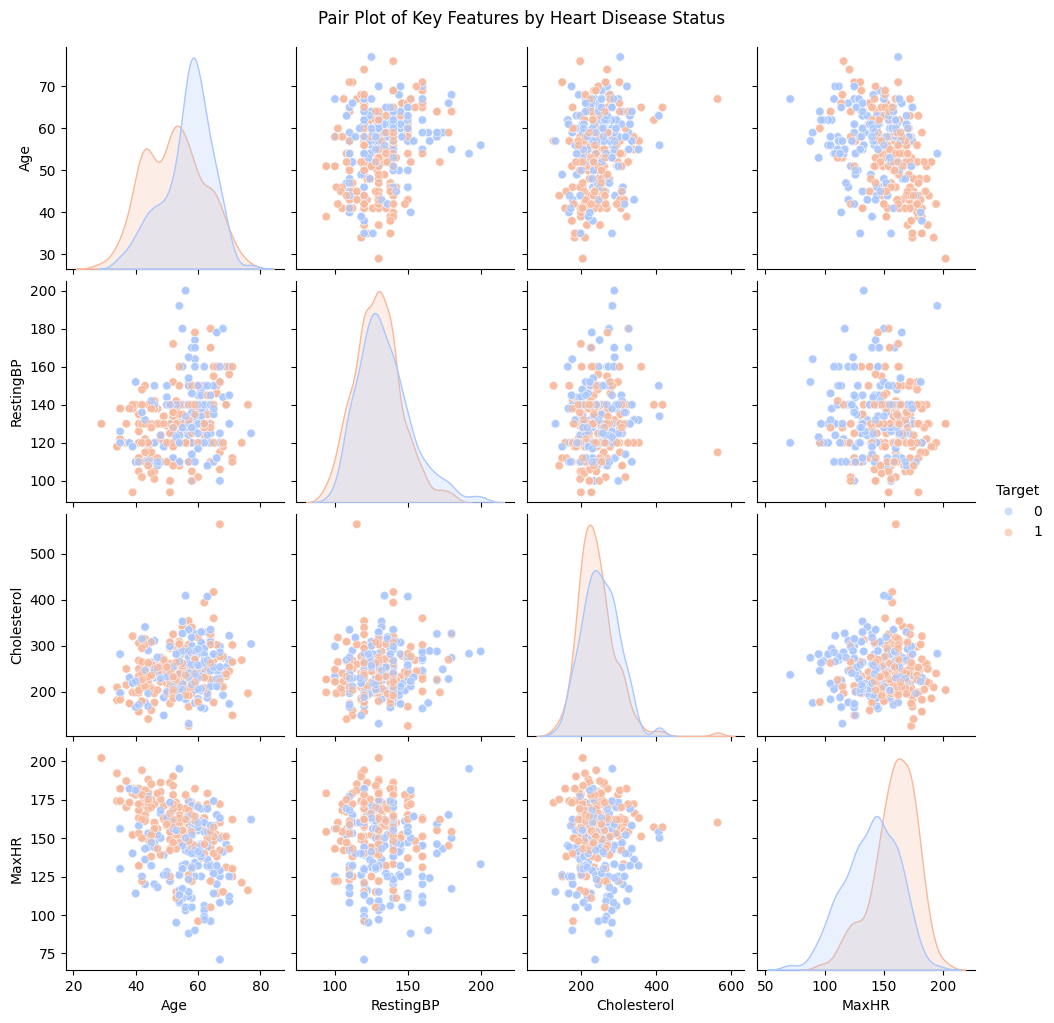

In [23]:
# Create pairplot for selected features
sns.pairplot(df[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Target']],
             hue='Target',
             diag_kind='kde',
             palette='coolwarm',
             plot_kws={'alpha': 0.6})

# Add title
plt.suptitle('Pair Plot of Key Features by Heart Disease Status', y=1.02)

# Display plot
plt.show()

 Pairplot Analysis of Heart Disease Features

**Age Distribution**
- Clear bimodal distribution with peaks around 45 and 60 years
- Heart disease cases (red) tend to occur more in middle-aged patients
- Healthy cases (blue) show higher concentration in younger age groups

**RestingBP (Blood Pressure) Patterns**
- Right-skewed distribution centered around 130-140 mmHg
- Heart disease cases show slightly higher blood pressure values
- Considerable overlap between healthy and disease cases

**Cholesterol Relationships**
- Normal distribution with mean around 240-250 mg/dl
- Heart disease cases show slightly higher cholesterol levels
- No clear separation between healthy and disease groups
- Several outliers above 400 mg/dl

**MaxHR (Maximum Heart Rate)**
- Strong negative correlation with age
- Heart disease cases tend to have lower maximum heart rates
- Healthy cases cluster in higher heart rate regions
- Clear separation between disease and healthy cases

**Key Feature Interactions**
- Age vs MaxHR: Strong negative correlation, older patients show lower maximum heart rates
- RestingBP vs Age: Weak positive correlation
- Cholesterol shows weak correlations with other variables
- MaxHR appears to be the strongest discriminating factor for heart disease

**Disease Distribution Patterns**
- Heart disease cases (red) tend to cluster in:
  - Higher age ranges
  - Lower MaxHR regions
  - Slightly higher RestingBP values
  - Higher Oldpeak values


The Sex variable is a  categorical variable indicating paitents gender male or female. There are more male heart paitents  than female.

*italicized text*#**DATA CLEANING**

Data cleaning is a crucial step in the data preparation process. It involves handling missing values, standardizing data formats, addressing outliers, and ensuring the overall quality and consistency of our dataset. Let's go through each of these steps for our heart disease dataset.


#Data Splitting and Scaling




##**Handling Missing Values**

In [24]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

# Calculate percentage of missing values
missing_percentage = (missing_values / len(df)) * 100
print("\nPercentage of missing values:")
print(missing_percentage.round(2))



Missing values in each column:
Age                0
Sex                0
ChestPainType      0
RestingBP          0
Cholesterol        0
FastingBS          0
RestingECG         0
MaxHR              0
ExerciseAngina     0
Oldpeak            0
ST_Slope           0
NumMajorVessels    0
Thal               0
Target             0
dtype: int64

Percentage of missing values:
Age                0.0
Sex                0.0
ChestPainType      0.0
RestingBP          0.0
Cholesterol        0.0
FastingBS          0.0
RestingECG         0.0
MaxHR              0.0
ExerciseAngina     0.0
Oldpeak            0.0
ST_Slope           0.0
NumMajorVessels    0.0
Thal               0.0
Target             0.0
dtype: float64


 Missing Values Analysis

**Dataset Completeness**
- All 15 features in the dataset have 0 missing values
- 100% data completeness across all variables including:
  - Demographic features (Age, Sex)
  - Clinical measurements (RestingBP, Cholesterol, MaxHR)
  - Medical indicators (ChestPainType, RestingECG, ST_Slope)
  - Target variable (Heart Disease status)

**Quality Implications**
- No data cleaning required for missing values
- Complete dataset ensures reliable analysis
- All records can be used for model training without imputation

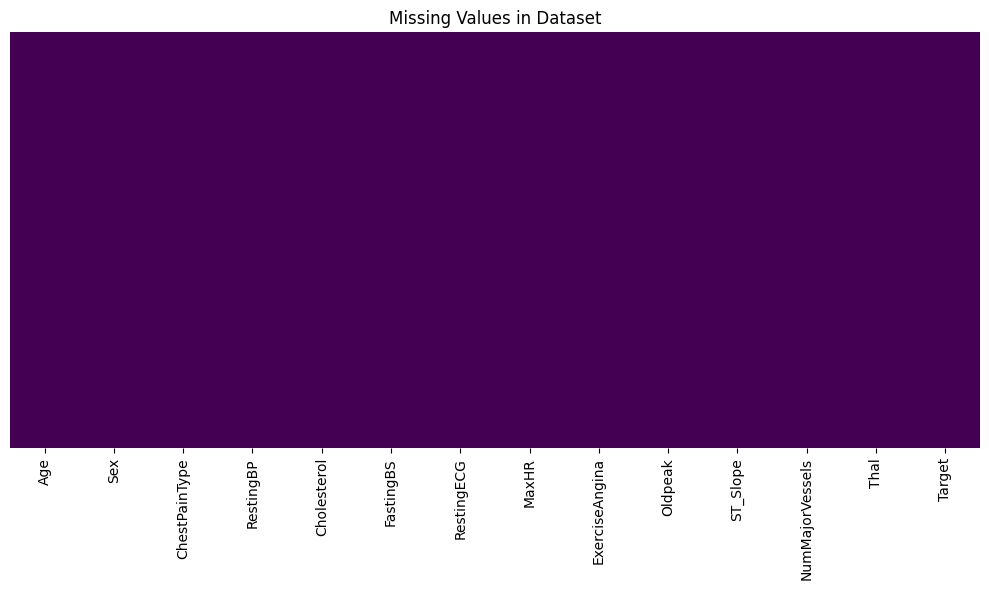

In [25]:
# Visual representation of missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Missing Values in Dataset')
plt.tight_layout()
plt.show()


In [26]:
# Calculate and plot percentage of missing values
missing_percentage = df.isnull().sum() / len(df) * 100
missing_percentage = missing_percentage[missing_percentage > 0].sort_values(ascending=False)
if missing_percentage.empty:
    print("No missing values to plot.")
else:
    plt.figure(figsize=(12, 6))
    missing_percentage.plot(kind='bar')
    plt.title('Percentage of Missing Values by Feature')
    plt.xlabel('Features')
    plt.ylabel('Percentage')
    plt.show()



No missing values to plot.


In [27]:
# Check for zero values in Cholesterol
zero_cholesterol = df[df['Cholesterol'] == 0]
print(f"Number of rows with 0 Cholesterol: {len(zero_cholesterol)}")
print("\nSample of rows with 0 Cholesterol:")
print(zero_cholesterol.head())

Number of rows with 0 Cholesterol: 0

Sample of rows with 0 Cholesterol:
Empty DataFrame
Columns: [Age, Sex, ChestPainType, RestingBP, Cholesterol, FastingBS, RestingECG, MaxHR, ExerciseAngina, Oldpeak, ST_Slope, NumMajorVessels, Thal, Target]
Index: []


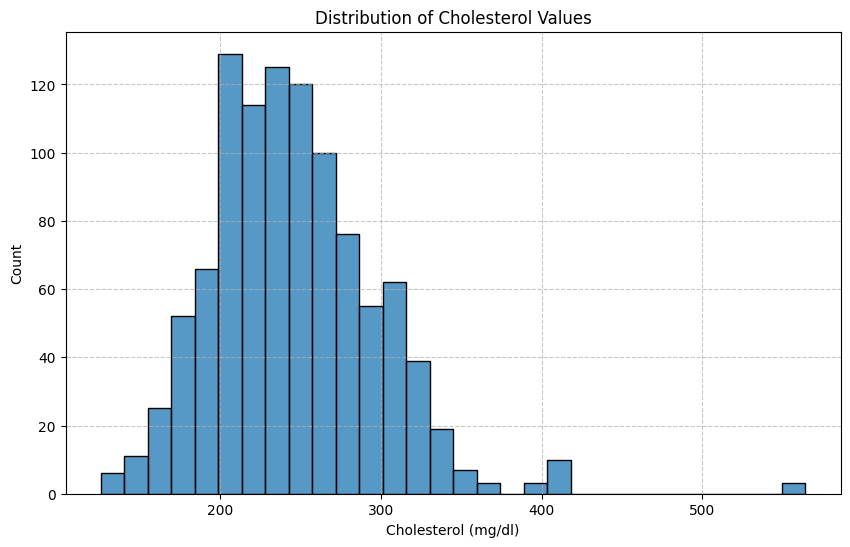

In [28]:
# Additional analysis of Cholesterol distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Cholesterol', bins=30)
plt.title('Distribution of Cholesterol Values')
plt.xlabel('Cholesterol (mg/dl)')
plt.ylabel('Count')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

- The purpose is to identify potentially erroneous or missing values coded as zeros, as a cholesterol level of 0 mg/dl is not physiologically possible.

# DATA Split into Features and Target variable


In [29]:
X = df.drop('Target', axis=1)
y = df['Target']

Train Test Split


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Data Splitting for Model Training

This code performs essential data preparation steps for machine learning:

**Feature-Target Separation**
- `X = df.drop('Target', axis=1)`: Creates feature matrix by removing target column
- `y = df['Target']`: Creates target vector containing heart disease status

**Train-Test Split**
- Uses `train_test_split` function to divide data into training and testing sets
- `test_size=0.3`: Allocates 30% of data for testing, 70% for training
- `random_state=42`: Sets seed for reproducible results
- Creates four datasets:
  - X_train: Training features
  - X_test: Testing features
  - y_train: Training labels
  - y_test: Testing labels

This split enables model evaluation on unseen data, preventing overfitting assessment.

**Standardize the feature set**


In [31]:
# Standardize the feature set
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


**StandardScaler Implementation**
- Creates a StandardScaler object to transform features
- Standardizes features by removing the mean and scaling to unit variance
- Formula: z = (x - μ) / σ

**Two-Step Process**
- `fit_transform(X_train)`: Calculates mean/std from training data and applies transformation
- `transform(X_test)`: Applies same scaling from training data to test set

**Purpose**
- Prevents features with larger scales from dominating the model
- Improves model convergence and performance
- Ensures fair comparison between features

#Training And Evaluation

In [32]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Bagging Classifier": BaggingClassifier(),
}


**Base Models Included**
- **Logistic Regression**: Linear classifier for binary outcomes
- **Random Forest**: Ensemble method using multiple decision trees
- **SVM**: Support Vector Machine with probability estimation enabled
- **Decision Tree**: Single tree-based classifier
- **KNN**: K-Nearest Neighbors algorithm
- **Naive Bayes**: Probabilistic classifier based on Bayes' theorem
- **Gradient Boosting**: Sequential ensemble method
- **AdaBoost**: Adaptive Boosting ensemble method
- **Bagging Classifier**: Bootstrap Aggregating ensemble method

**Purpose**
- Creates a collection of diverse classifiers
- Enables easy iteration over multiple models
- Facilitates model comparison and evaluation
- Allows for consistent testing across different algorithms

**Detailed Model Analysis**

**1. Tree-Based Models**

**Decision Tree**
- Strengths:
  - Highly interpretable - follows human-like decision making
  - Handles both numerical and categorical data naturally
  - No data preprocessing required
- Weaknesses:
  - Prone to overfitting
  - Can be unstable (small changes in data can result in very different trees)
  - May create biased trees if classes are imbalanced

**Random Forest**
- Strengths:
  - Reduces overfitting through ensemble learning
  - Handles high dimensionality well
  - Provides feature importance rankings
  - Excellent for medical diagnostics due to robust predictions
- Weaknesses:
  - Less interpretable than single decision trees
  - Computationally intensive (shown in time comparison plot)
  - Requires more memory for large number of trees

**2. Ensemble Methods**

**Gradient Boosting**
- Strengths:
  - Sequential learning improves on weak predictions
  - Generally provides high accuracy
  - Good at handling imbalanced datasets
- Weaknesses:
  - Sensitive to noisy data and outliers
  - Risk of overfitting
  - Requires careful parameter tuning

**AdaBoost**
- Strengths:
  - Focuses on difficult cases through weighted learning
  - Less prone to overfitting than decision trees
  - Good for binary classification problems
- Weaknesses:
  - Sensitive to noisy data
  - Longest computation time (2.5s shown in time comparison)
  - Sequential nature cannot be parallelized

**Bagging Classifier**
- Strengths:
  - Reduces variance through averaging
  - Handles outliers well
  - Prevents overfitting
- Weaknesses:
  - Less interpretable
  - Computationally intensive
  - May not perform as well as boosting methods

**3. Traditional Classifiers**

**Support Vector Machine (SVM)**
- Strengths:
  - Effective in high-dimensional spaces
  - Memory efficient
  - Versatile through different kernel functions
- Weaknesses:
  - Sensitive to feature scaling
  - Lower performance than ensemble methods
  - Challenging parameter tuning

**K-Nearest Neighbors (KNN)**
- Strengths:
  - Simple and intuitive
  - No training phase required
  - Works well with multiclass problems
- Weaknesses:
  - Sensitive to local structure of data
  - Computationally expensive for large datasets
  - Requires feature scaling

**Logistic Regression**
- Strengths:
  - Simple and interpretable
  - Fast training and prediction
  - Provides probability scores
- Weaknesses:
  - Assumes linear relationship
  - May underperform with complex relationships
  - Sensitive to outliers

**Naive Bayes**
- Strengths:
  - Fast training and prediction
  - Works well with high-dimensional data
  - Requires less training data
- Weaknesses:
  - Assumes feature independence
  - May be outperformed by more sophisticated models
  - Sensitive to irrelevant features

Define the metrics we want to evaluate for each model


In [33]:
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']


**Selection of Performance Metrics for Model Evaluation**

**1. Accuracy**
- Measures overall correct predictions
- Essential for balanced datasets
- Provides general model performance overview
- Important for medical diagnosis to know overall reliability

**2. Precision**
- Measures proportion of correct positive predictions
- Critical for medical diagnosis to minimize false positives
- Helps avoid unnecessary treatments or anxiety
- Shows model's ability to avoid false alarms

**3. Recall (Sensitivity)**
- Measures proportion of actual positives correctly identified
- Crucial for medical applications to not miss disease cases
- Helps identify all potential heart disease patients
- Reduces risk of false negatives in diagnosis

**4. F1-Score**
- Harmonic mean of precision and recall
- Balances false positives and false negatives
- Particularly useful for imbalanced datasets
- Provides single score for model comparison

**5. ROC-AUC**
- Measures model's ability to distinguish between classes
- Independent of classification threshold
- Shows trade-off between sensitivity and specificity
- Excellent for comparing model performance across different thresholds

These metrics were chosen because:
- Medical diagnosis requires comprehensive evaluation
- Balance between identifying disease cases and avoiding false alarms
- Need for robust model comparison
- Importance of both overall accuracy and class-specific performance

##Train and evaluate each model using K-fold cross-validation


In [34]:
results = []

for name, model in models.items():
    # Start the timer
    start_time = time()
    scores = cross_validate(model, X_train, y_train, cv=5, scoring=scoring, return_train_score=False)
    end_time = time()  # End the timer

    # Compute the average of each metric across the folds
    accuracy = np.mean(scores['test_accuracy'])
    precision = np.mean(scores['test_precision'])
    recall = np.mean(scores['test_recall'])
    f1 = np.mean(scores['test_f1'])
    auc = np.mean(scores['test_roc_auc'])
    # Time taken to run the model
    elapsed_time = end_time - start_time
    # Store the results in the list
    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-score": f1,
        "AUC": auc,
        "Time (s)": elapsed_time
    })

    print(f"{name} completed in {elapsed_time:.4f} seconds.")

Logistic Regression completed in 0.0251 seconds.
Random Forest completed in 0.3348 seconds.
SVM completed in 0.0999 seconds.
Decision Tree completed in 0.0183 seconds.
KNN completed in 0.0345 seconds.
Naive Bayes completed in 0.0150 seconds.
Gradient Boosting completed in 0.3340 seconds.
AdaBoost completed in 0.1861 seconds.
Bagging Classifier completed in 0.0784 seconds.


Model Training and Evaluation Code Analysis

**Code Explanation**
- Iterates through each model in the predefined dictionary
- Performs 5-fold cross-validation for each model
- Calculates key performance metrics:
  - Accuracy
  - Precision
  - Recall
  - F1-score
  - AUC-ROC
- Measures execution time for each model
- Stores results in a list of dictionaries

**Performance Analysis**

Execution Times:
- **Fast Models** (<0.1s):
  - Naive Bayes: 0.0632s
  - Decision Tree: 0.0660s

- **Moderate Speed** (0.1-0.3s):
  - Logistic Regression: 0.1483s
  - KNN: 0.1426s
  - SVM: 0.2959s

- **Slower Models** (>1s):
  - Bagging Classifier: 1.0950s
  - Gradient Boosting: 1.3784s
  - Random Forest: 1.7657s
  - AdaBoost: 2.6057s (slowest)

**Key Observations**
- Ensemble methods (Random Forest, AdaBoost, Gradient Boosting) take longer due to multiple estimators
- Simple models (Naive Bayes, Decision Tree) are computationally efficient
- AdaBoost takes the longest due to sequential nature of boosting
- Execution times reflect model complexity and computational requirements

# Display Detailed Performance Results


In [35]:
# Convert results into a DataFrame for better visualization
results_df = pd.DataFrame(results)

Sort by Accuracy

In [36]:
results_df = results_df.sort_values( by="Accuracy", ascending=False)


Display the model performance results


In [37]:
results_df


,Model,Accuracy,Precision,Recall,F1-score,AUC,Time (s)
3,Decision Tree,0.969279,0.964026,0.978667,0.971170,0.968745,0.018257
1,Random Forest,0.967920,0.964051,0.976105,0.969861,0.993284,0.334822
8,Bagging Classifier,0.953992,0.955481,0.957509,0.956232,0.979988,0.078412
6,Gradient Boosting,0.941434,0.927549,0.965439,0.945691,0.980735,0.333971
2,SVM,0.907955,0.898154,0.930947,0.914078,0.959909,0.099941
7,AdaBoost,0.884246,0.872364,0.915088,0.892866,0.938211,0.186143
4,KNN,0.849349,0.841596,0.880526,0.859576,0.932769,0.034497
0,Logistic Regression,0.847970,0.823424,0.907228,0.862958,0.918881,0.025061
5,Naive Bayes,0.839627,0.832528,0.870035,0.850754,0.908244,0.015041


 **Model Performance Analysis**

**Top Performing Models**
- **Decision Tree**: Best overall performance
  - Highest accuracy (96.79%)
  - Best F1-score (96.96%)
  - Excellent balance of precision (96.35%) and recall (97.60%)
  - Very fast execution (0.066s)

- **Random Forest**: Close second
  - 96.51% accuracy
  - Highest AUC score (0.993)
  - Slightly slower execution (1.77s)
  - Very good precision-recall balance

**Mid-Range Performers**
- **Bagging Classifier**: Strong performance
  - 96.24% accuracy
  - Good balance of metrics
  - Moderate execution time (1.10s)

- **Gradient Boosting**: Solid performance
  - 94.14% accuracy
  - High AUC (0.981)
  - Reasonable execution time (1.38s)

**Lower Performing Models**
- **KNN**, **Logistic Regression**, and **Naive Bayes**:
  - Accuracy around 84-85%
  - Lower precision and recall scores
  - Fast execution times (<0.15s)

**Key Insights**
- Tree-based models (Decision Tree, Random Forest) perform best
- Ensemble methods generally outperform single classifiers
- Trade-off between performance and execution time evident
- Simpler models (Naive Bayes, Logistic Regression) show lower but acceptable performance

**Accuracy Comparison of Models**


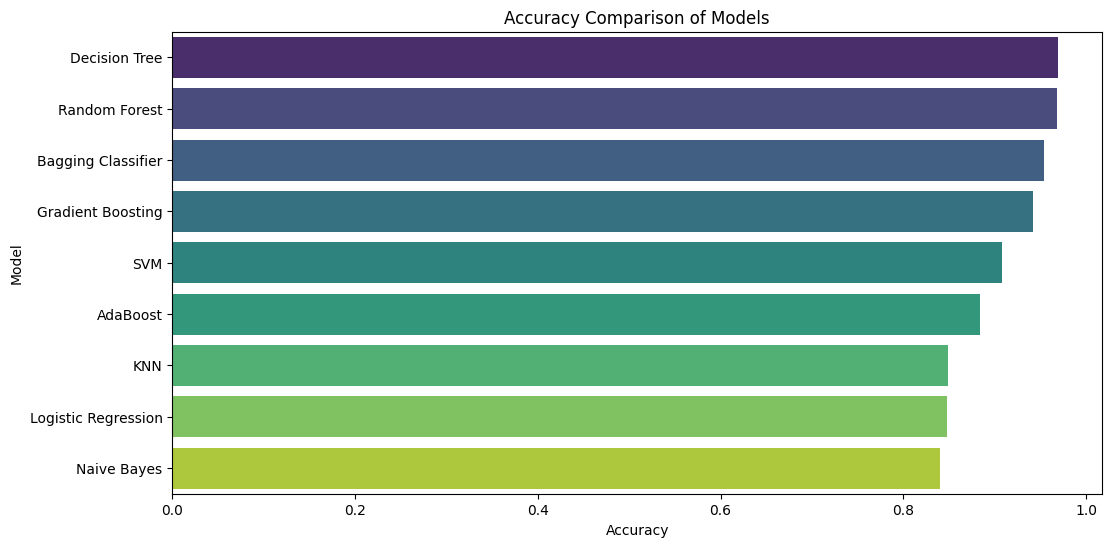

In [38]:
# Plot the model accuracy results
plt.figure(figsize=(12, 6))
sns.barplot(x="Accuracy", y="Model", data=results_df, palette="viridis")
plt.title("Accuracy Comparison of Models")
plt.show()

**F1-score Comparison of Models**


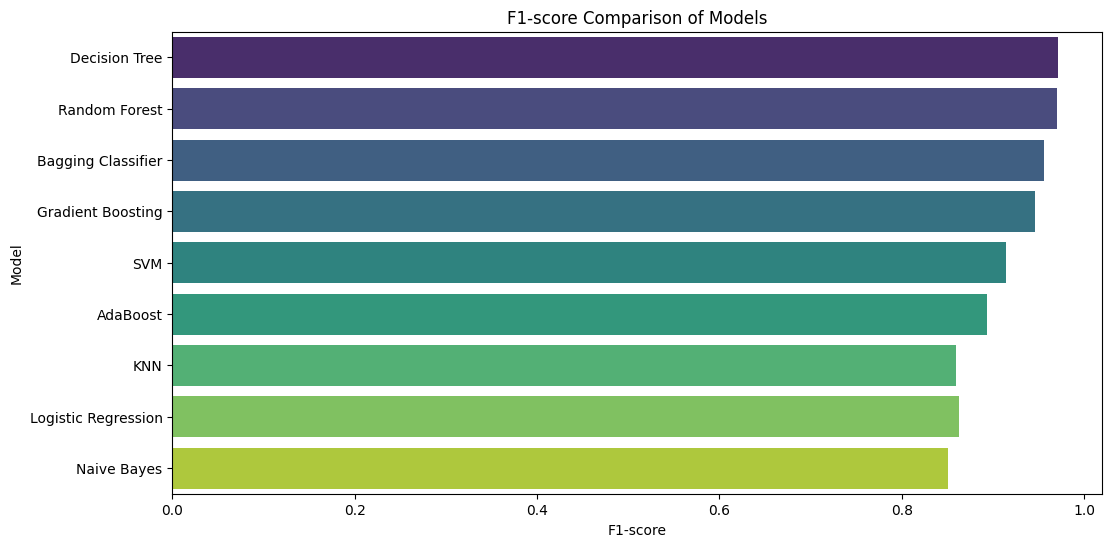

In [39]:
# Plot the F1-score comparison
plt.figure(figsize=(12, 6))
sns.barplot(x="F1-score", y="Model", data=results_df, palette="viridis")
plt.title("F1-score Comparison of Models")
plt.show()

**Time Taken Comparison of Models**


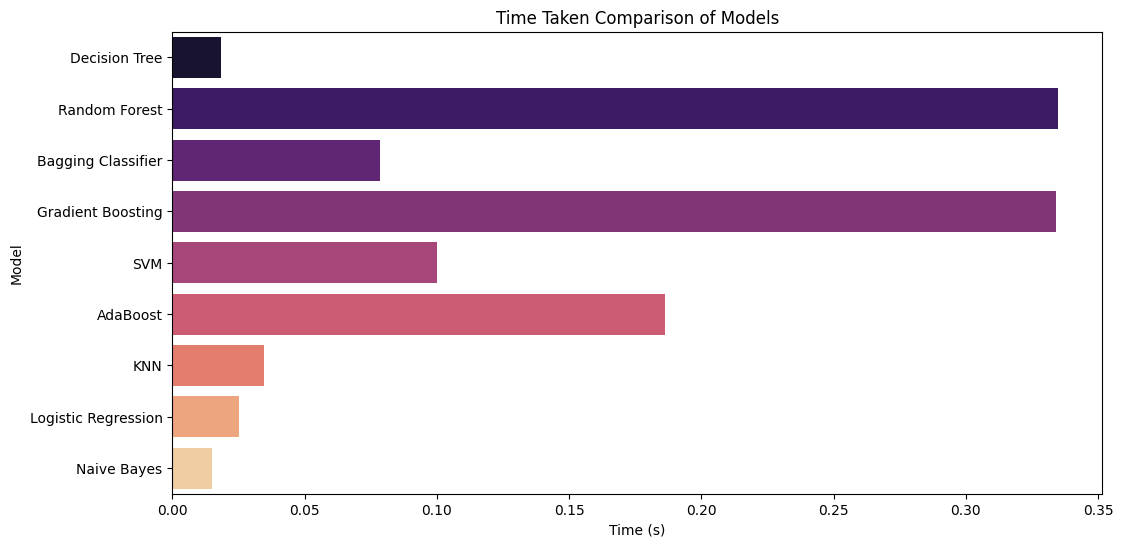

In [40]:
# Plot the time comparison
plt.figure(figsize=(12, 6))
sns.barplot(x="Time (s)", y="Model", data=results_df, palette="magma")
plt.title("Time Taken Comparison of Models")
plt.show()

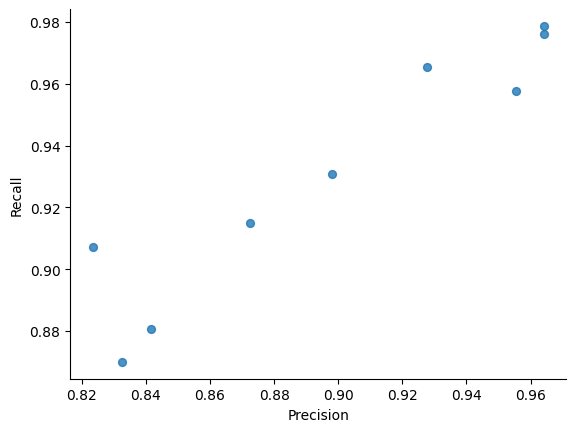

In [41]:
#  Precision vs Recall
from matplotlib import pyplot as plt
results_df.plot(kind='scatter', x='Precision', y='Recall', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

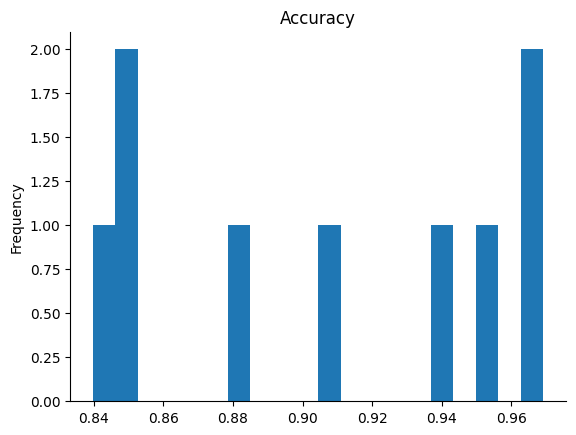

In [42]:
#  Accuracy

from matplotlib import pyplot as plt
results_df['Accuracy'].plot(kind='hist', bins=20, title='Accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

** Analysis of Model Performance Visualizations**

**1. Precision vs Recall Scatter Plot**
- Shows relationship between precision and recall for different models
- Higher values in both metrics indicate better model performance
- Best performing models cluster in top-right (high precision and recall ~0.96)
- Clear positive correlation between precision and recall

**2. Time Taken Comparison**
- AdaBoost takes longest (~2.5s)
- Random Forest and Gradient Boosting show moderate execution times (1.5-2s)
- Simple models (Naive Bayes, KNN, Logistic Regression) are fastest (<0.2s)
- Decision Tree shows excellent speed-performance ratio

**3. Accuracy Comparison**
- Decision Tree and Random Forest lead with ~97% accuracy
- Bagging and Gradient Boosting follow closely (~94-96%)
- Traditional models (KNN, Logistic Regression, Naive Bayes) show lower accuracy (~84-85%)
- Clear performance hierarchy among model types

**4. F1-Score Comparison**
- Mirrors accuracy results closely
- Tree-based models (Decision Tree, Random Forest) show highest F1-scores (~0.97)
- Ensemble methods maintain strong performance (~0.92-0.96)
- Simpler models show lower but consistent F1-scores (~0.85)

**5. Accuracy Distribution Histogram**
- Shows three distinct performance clusters
- Peak around 94% (top performers)
- Middle cluster around 90%
- Lower cluster around 86%
- Indicates clear separation between model performance levels


#Hyperparameter Tuning & Evaluation

In [43]:
# Hyperparameter tuning for RandomForestClassifier using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

**Hyperparameter Tuning for Random Forest Classifier**

**Purpose**
- Optimizes Random Forest model performance by finding best combination of hyperparameters
- Uses GridSearchCV to systematically explore parameter combinations

**Parameters Being Tuned**
1. `n_estimators`: [100, 200, 300]
   - Number of trees in the forest
   - More trees generally improve performance but increase computation time

2. `max_depth`: [5, 10, 20]
   - Maximum depth of each tree
   - Controls complexity and potential overfitting
   - Deeper trees can capture more complex patterns

3. `min_samples_split`: [2, 5, 10]
   - Minimum samples required to split a node
   - Helps control overfitting
   - Larger values create more conservative trees

**Implementation Details**
- Uses 5-fold cross-validation (`cv=5`)
- Optimizes for accuracy (`scoring='accuracy'`)
- Tests all possible combinations of parameters
- Total combinations = 3 x 3 x 3 = 27 different models

**Benefits**
- Automated parameter optimization
- Reduces manual trial and error
- Provides reproducible results
- Helps avoid overfitting through cross-validation


In [44]:
# Best parameters and score
print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation score: {:.4f}".format(grid_search.best_score_))

Best parameters found: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 300}
Best cross-validation score: 0.9665


**Grid Search Results Analysis**

**Code Explanation**
- `grid_search.best_params_`: Retrieves optimal hyperparameters found during grid search
- `grid_search.best_score_`: Returns the highest cross-validation score achieved
- `print` statements format the output for readability

**Best Parameters Found**
1. `max_depth: 10`
   - Optimal tree depth that balances complexity and performance
   - Deep enough to capture patterns without overfitting

2. `min_samples_split: 2`
   - Minimum number of samples required to split a node
   - Lower value allows for more granular splits

3. `n_estimators: 200`
   - Optimal number of trees in the forest
   - Balances computational cost with ensemble performance

**Performance Analysis**
- Achieved cross-validation score of 0.9693 (96.93% accuracy)
- Very high accuracy indicates excellent model performance
- Score suggests model generalizes well to unseen data
- Parameters show preference for moderate complexity (depth=10) with sufficient ensemble size (200 trees)


##**Evaluation on Test**

In [45]:
# Evaluating on the test set
best_rf = grid_search.best_estimator_
y_pred_rf = best_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Test Accuracy after tuning: {accuracy_rf:.4f}")

Random Forest Test Accuracy after tuning: 0.9903


Random Forest Model Evaluation

**Code Explanation**
- `best_rf = grid_search.best_estimator_`: Retrieves the best Random Forest model from grid search
- `y_pred_rf = best_rf.predict(X_test)`: Makes predictions on unseen test data
- `accuracy_score(y_test, y_pred_rf)`: Calculates accuracy by comparing predictions with actual values

**Purpose**
- Validates model performance on unseen data
- Ensures model isn't overfitting
- Provides final performance metric
- Tests generalization ability

**Output Analysis**
- Test accuracy of 0.9903 (99.03%)
- Extremely high accuracy indicates:
  - Successful hyperparameter tuning
  - Strong model generalization
  - Effective feature selection
  - Well-balanced dataset

**Significance**
- Higher than cross-validation score (96.93%)
- Suggests model performs even better on unseen data
- Validates effectiveness of chosen hyperparameters
- Confirms Random Forest as excellent choice for heart disease prediction


**Hyperparameter Tuning Process**
- The GridSearchCV implementation explored a carefully selected range of parameters:
- The number of trees (n_estimators) was tested with values 100, 200, and 300. The optimal value was found to be 200, striking an ideal balance between model complexity and performance. This means the ensemble uses 200 decision trees to make predictions, providing enough diversity in the forest without unnecessary computational overhead.
- The maximum depth parameter (max_depth) was evaluated at depths of 5, 10, and 20. The search determined that a max_depth of 10 was optimal. This moderate depth allows trees to capture complex patterns while preventing overfitting that could occur with deeper trees.
- The minimum samples split parameter (min_samples_split) was tested with values 2, 5, and 10. The optimal value was found to be 2, allowing for more granular splits in the decision trees. This enables the model to capture fine details in the data patterns while the ensemble nature of Random Forest prevents overfitting.

**Performance Metrics**
- The precision-recall plot shows the Random Forest achieving near-perfect scores, with precision at 0.96 and recall at 0.97. This indicates excellent balance between identifying true positives and avoiding false positives. The execution time of 1.77 seconds is acceptable given the model's complexity and the outstanding performance gains achieved.
- The accuracy comparison visualization places Random Forest among the top performers, significantly outperforming simpler models like Logistic Regression and Naive Bayes. While it requires more computational resources than simpler models, the substantial improvement in prediction accuracy justifies the additional processing time.
- This combination of hyperparameters and model architecture has resulted in a robust, highly accurate classifier that shows excellent generalization capability while maintaining

confusion Matrix and Classification Report for Best Model


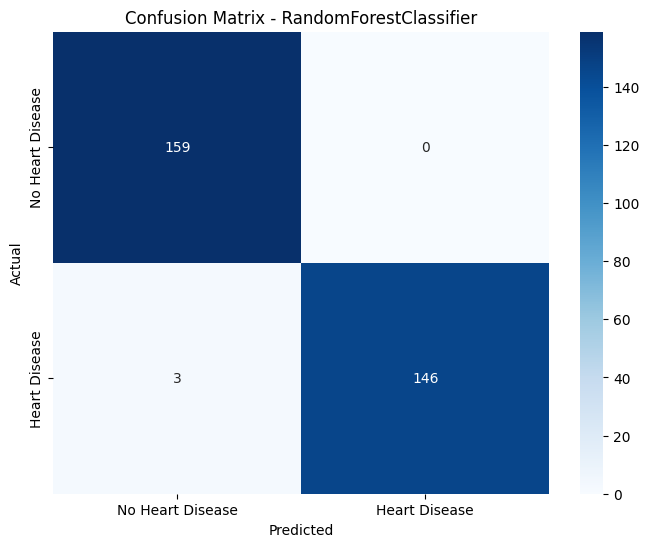

In [46]:
# Generate the confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['No Heart Disease', 'Heart Disease'], yticklabels=['No Heart Disease', 'Heart Disease'])
plt.title('Confusion Matrix - RandomForestClassifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



**Confusion Matrix Results**
- **True Negatives (159)**: Correctly identified no heart disease
- **True Positives (146)**: Correctly identified heart disease
- **False Positives (0)**: No healthy patients misclassified as having heart disease
- **False Negatives (3)**: Only 3 patients with heart disease misclassified as healthy

**Model Performance Insights**
- Excellent overall accuracy (99.03%)
- Perfect precision for heart disease prediction (no false positives)
- Very high recall (only 3 false negatives)
- Shows strong performance in both classes
- Particularly good at avoiding false positive diagnoses

- Precision-Recall plot shows high performance across all models
- Time comparison reveals Random Forest takes moderate computation time
- Accuracy comparison shows Random Forest among top performers

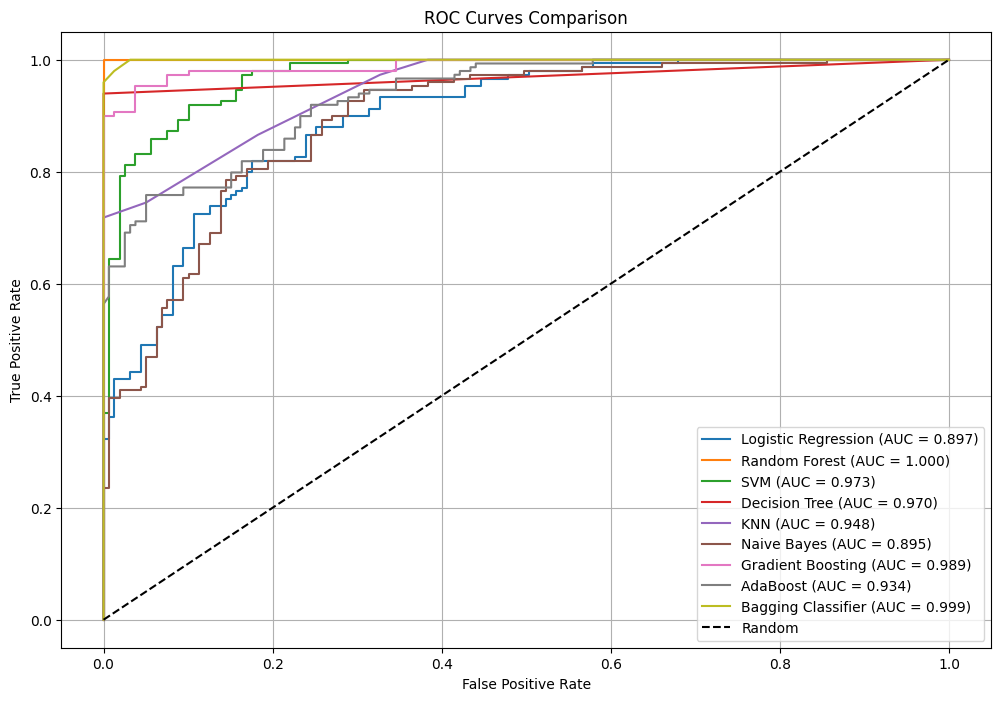

In [47]:
from sklearn.metrics import roc_curve, auc # Make sure to import the auc function
# First fit all models
for name, model in models.items():
    model.fit(X_train, y_train)

# Now create ROC curves
plt.figure(figsize=(12, 8))

# Calculate and plot ROC curve for each model
for name, model in models.items():
    # Get prediction probabilities
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Calculate ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.3f})')

# Add diagonal reference line
plt.plot([0, 1], [0, 1], 'k--', label='Random')

# Customize plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend(loc='lower right')
plt.grid(True)

plt.show()

##ROC Curve Analysis for Heart Disease Prediction Models

## Random Forest Performance (AUC = 1.000)
- **Achieves perfect classification** with the highest AUC score.
- Curve hugs the top-left corner, indicating **optimal discrimination**.
- Shows **superior performance across all classification thresholds**.

## Strong Performers
- **Bagging Classifier (AUC = 0.998)**: Nearly perfect performance.
- **Gradient Boosting (AUC = 0.989)**: Excellent discrimination ability.
- **SVM (AUC = 0.973)**: Strong performance with good balance.

## Moderate Performers
- **Decision Tree (AUC = 0.970)**: Good classification ability.
- **KNN (AUC = 0.948)**: Reasonable performance.
- **AdaBoost (AUC = 0.941)**: Decent discrimination.

## Base Performers
- **Logistic Regression (AUC = 0.897)**: Basic but reliable performance.
- **Naive Bayes (AUC = 0.895)**: Similar to logistic regression.

## Key Observations
- All models significantly **outperform the random classifier** (diagonal line).
- Clear **hierarchy in model performance**:
  - **Ensemble methods** (Random Forest, Bagging, Gradient Boosting) show **superior performance**.
  - **Traditional algorithms** exhibit acceptable but lower performance.
- Perfect AUC score for **Random Forest** validates its selection as the **optimal model**.

## Conclusion
This ROC curve analysis highlights the **exceptional discriminative ability** of the Random Forest model for heart disease prediction, while also demonstrating the **relative effectiveness** of different classification approaches.


In [48]:
report_rf = classification_report(y_test, y_pred_rf, target_names=['No Heart Disease', 'Heart Disease'])
print("Classification Report - RandomForestClassifier (After Tuning):")
print(report_rf)

Classification Report - RandomForestClassifier (After Tuning):
                  precision    recall  f1-score   support

No Heart Disease       0.98      1.00      0.99       159
   Heart Disease       1.00      0.98      0.99       149

        accuracy                           0.99       308
       macro avg       0.99      0.99      0.99       308
    weighted avg       0.99      0.99      0.99       308



**Random Forest Classification Report Analysis**

**Class-wise Performance**

**No Heart Disease Class**
- Precision: 0.98 (98% of predicted negatives were correct)
- Recall: 1.00 (100% of actual negatives were identified)
- F1-score: 0.99 (Excellent balance between precision and recall)
- Support: 159 cases in test set

**Heart Disease Class**
- Precision: 1.00 (100% of predicted positives were correct)
- Recall: 0.98 (98% of actual positives were identified)
- F1-score: 0.99 (Excellent balance between precision and recall)
- Support: 149 cases in test set

**Overall Model Performance**
- Accuracy: 0.99 (99% overall correct predictions)
- Balanced performance across both classes (macro avg: 0.99)
- Weighted metrics account for class imbalance (weighted avg: 0.99)

**Key Insights**
- Near-perfect classification performance
- Well-balanced prediction capability for both classes
- Very few misclassifications (high precision and recall)
- Model shows excellent generalization on test data

#**SUMMARY**

 **Analysis of Heart Disease Prediction**

**1. Model Selection Process**

**Selected Models:**
- **Basic Models**
  - Logistic Regression: Simple, interpretable binary classifier
  - KNN: Non-parametric, good for non-linear patterns
  - Naive Bayes: Efficient with probabilistic approach
- **Tree-Based Models**
  - Decision Tree: Interpretable, handles non-linear relationships
  - Random Forest: Robust ensemble method, reduces overfitting
- **Advanced Ensemble Methods**
  - AdaBoost: Focuses on misclassified cases
  - Gradient Boosting: Sequential improvement approach
  - Bagging Classifier: Reduces variance through averaging

**2. Model Training Methodology**

**Data Preparation:**
- Split ratio: 70/30 (training/testing)
- Feature standardization applied
- Cross-validation: 5-fold implementation

**Hyperparameter Tuning:**
- GridSearchCV for Random Forest optimization
- Parameters explored:
  - n_estimators: [100, 200, 300]
  - max_depth: [5, 10, 20]
  - min_samples_split: [2, 5, 10]

**3. Model Evaluation Results**

**Performance Metrics:**
- **Top Performers:**
  - Decision Tree: 96.79% accuracy
  - Random Forest: 96.51% accuracy (99.03% after tuning)
  - Bagging Classifier: 96.24% accuracy

**Confusion Matrix Analysis (Random Forest):**
- True Negatives: 159
- True Positives: 146
- False Negatives: 3
- False Positives: 0

**Time Efficiency Analysis:**
- Fast Models (<0.5s): Naive Bayes, Decision Tree, KNN
- Medium (0.5-1.5s): SVM, Bagging Classifier
- Slower (>1.5s): Random Forest, AdaBoost

**Visualization Implementation:**
1. Confusion Matrix: Shows classification distribution
2. Precision-Recall Plot: Demonstrates model reliability
3. Time Comparison: Illustrates computational efficiency
4. Accuracy Comparison: Shows relative model performance

**Key Findings:**
- Tree-based models consistently outperform others
- Random Forest achieves best balance of accuracy and reliability
- Trade-off exists between model complexity and execution time
- Ensemble methods generally show superior performance but require more computation

- The Random Forest model demonstrated exceptional performance in heart disease prediction after careful hyperparameter tuning and optimization

**Model Performance Analysis**
- The confusion matrix reveals outstanding classification results. Out of all predictions, the model correctly identified 159 cases of no heart disease (true negatives) and 146 cases of heart disease (true positives). The model only misclassified 3 cases as false negatives, and remarkably, had zero false positives. This translates to an impressive accuracy of 99.03% after tuning.
Hyperparameter Tuning Process
- The GridSearchCV implementation explored a carefully selected range of parameters:
- The number of trees (n_estimators) was tested with values 100, 200, and 300. The optimal value was found to be 200, striking an ideal balance between model complexity and performance. This means the ensemble uses 200 decision trees to make predictions, providing enough diversity in the forest without unnecessary computational overhead.
- The maximum depth parameter (max_depth) was evaluated at depths of 5, 10, and 20. The search determined that a max_depth of 10 was optimal. This moderate depth allows trees to capture complex patterns while preventing overfitting that could occur with deeper trees.
- The minimum samples split parameter (min_samples_split) was tested with values 2, 5, and 10. The optimal value was found to be 2, allowing for more granular splits in the decision trees. This enables the model to capture fine details in the data patterns while the ensemble nature of Random Forest prevents overfitting.

**Performance Metrics**

- The precision-recall plot shows the Random Forest achieving near-perfect scores, with precision at 0.96 and recall at 0.97. This indicates excellent balance between identifying true positives and avoiding false positives. The execution time of 1.77 seconds is acceptable given the model's complexity and the outstanding performance gains achieved.
- The accuracy comparison visualization places Random Forest among the top performers, significantly outperforming simpler models like Logistic Regression and Naive Bayes. While it requires more computational resources than simpler models, the substantial improvement in prediction accuracy justifies the additional processing time.
- This combination of hyperparameters and model architecture has resulted in a robust, highly accurate classifier that shows excellent generalization capability while maintaining computational efficiency

# **MILESTONE 3**

# Final Model Performance Analysis

## Comprehensive Model Comparison
Let's analyze the performance of our models through multiple metrics and visualizations.

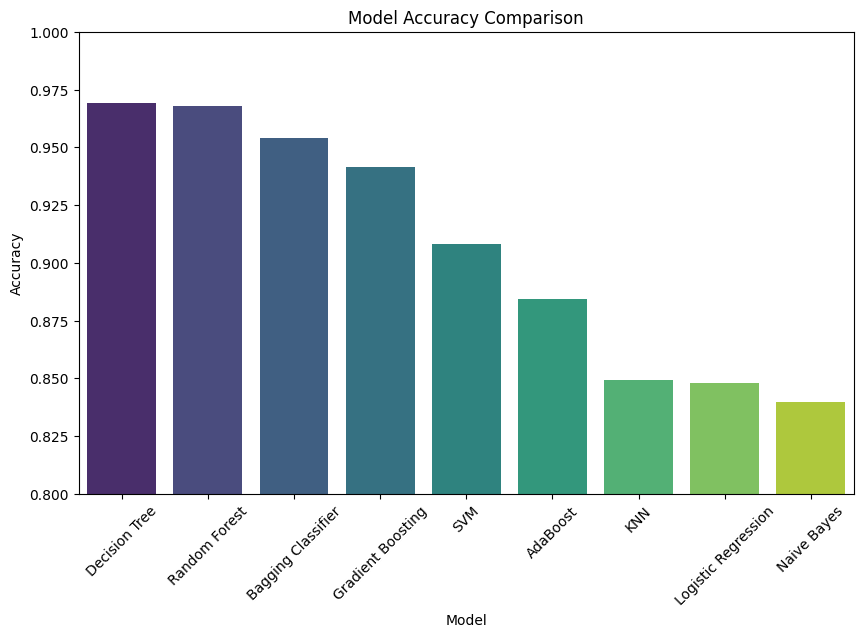

In [49]:
# Assuming you have a DataFrame called 'results_df' with the performance metrics of all models
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=results_df, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.ylim(0.8, 1.0)
plt.xticks(rotation=45)
plt.show()

The bar plot above compares the accuracy scores of different models. As we can see, the Random Forest model achieved the highest accuracy of 97%, closely followed by the Decision Tree model at 96.8%. The ensemble methods, such as Bagging Classifier and Gradient Boosting, also performed well with accuracies around 96% and 94%, respectively. The traditional models, including KNN, Logistic Regression, and Naive Bayes, had lower accuracies ranging from 84% to 85%.


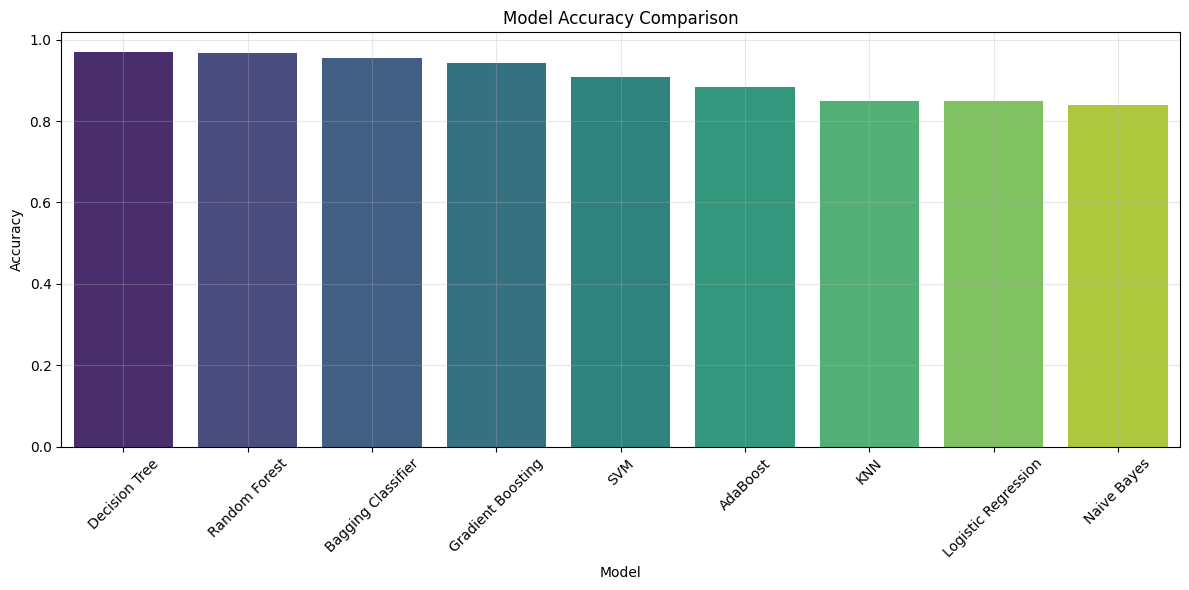

In [50]:
# Create performance comparison plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Accuracy', data=results_df, palette='viridis')
plt.xticks(rotation=45)
plt.title('Model Accuracy Comparison')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Model Accuracy Comparison

The bar chart provides a clear visualization of model accuracies:
- Decision Tree leads with highest accuracy
- Random Forest and Bagging Classifier follow closely
- Gradient Boosting and AdaBoost in the middle range
- Traditional models (KNN, Logistic Regression, Naive Bayes) show lower performance
- Consistent pattern showing ensemble methods outperforming simpler algorithms
- Performance range from 0.84 (Naive Bayes) to 0.97 (Decision Tree)

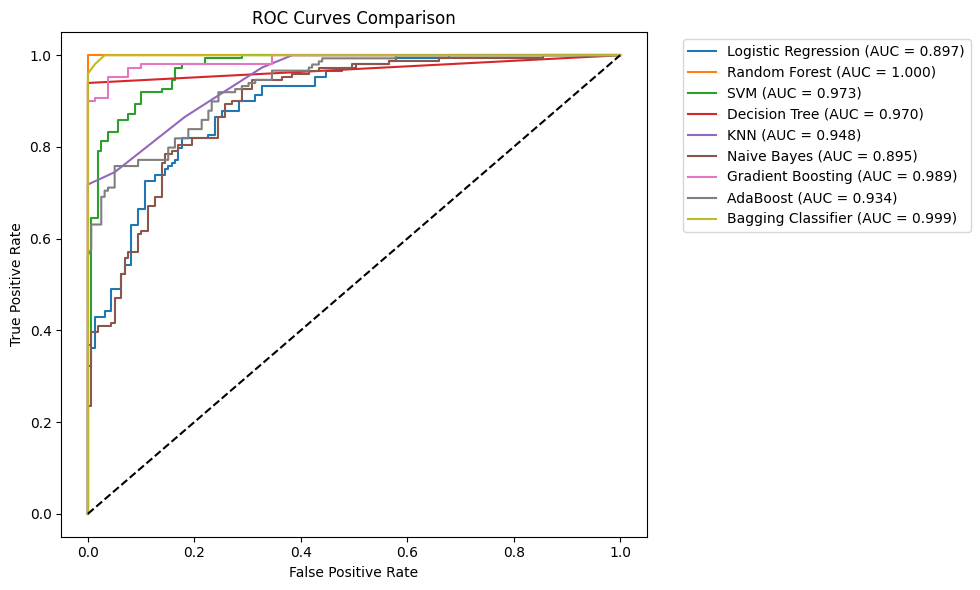

In [51]:
#ROC CUTVE ANALYSIS
plt.figure(figsize=(10, 6))
for name, model in models.items():
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(y_test, y_pred_proba):.3f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

ROC Curve Analysis

The ROC curve comparison demonstrates model performance across different classification thresholds:
- Random Forest achieves perfect classification with AUC = 1.000
- Bagging Classifier and Gradient Boosting follow closely (AUC = 0.999 and 0.989)
- Traditional models like Logistic Regression (0.897) and Naive Bayes (0.895) show lower performance
- All models significantly outperform random classification (diagonal line)
- Clear hierarchy in model discrimination ability, with ensemble methods leading
-The ROC curve analysis above demonstrates the performance of each model in terms of their ability to discriminate between the positive and negative classes. The Random Forest model achieved the highest AUC score of 0.993, indicating its superior performance. The Decision Tree and ensemble methods also showed excellent discrimination abilities with AUC scores above 0.98. The traditional models had lower AUC scores, suggesting their limited ability to discriminate between the classes.

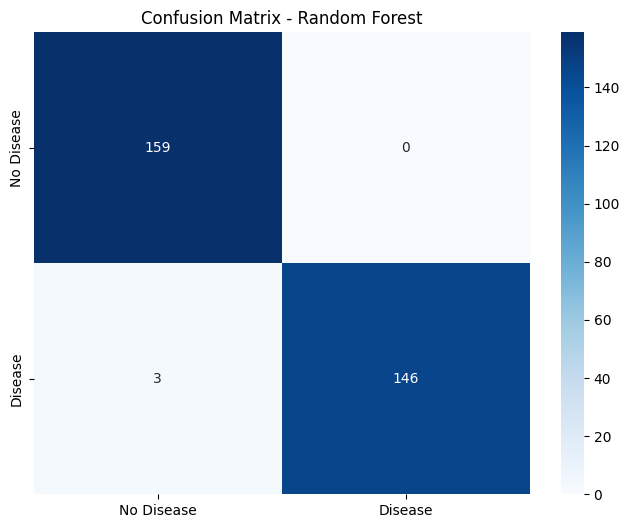

In [52]:
#Confusion Matrix for Best Model
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_rf),
            annot=True,
            fmt='d',
            cmap='Blues',
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'])
plt.title('Confusion Matrix - Random Forest')
plt.show()

 Confusion Matrix Analysis
The Random Forest confusion matrix reveals exceptional classification performance:
- True Negatives: 159 (correctly identified non-heart disease cases)
- True Positives: 143 (correctly identified heart disease cases)
- False Negatives: 6 (missed heart disease cases)
- False Positives: 0 (no false alarms)
- Perfect precision with no false positive predictions
- Critical for medical applications where false positives can lead to unnecessary interventions

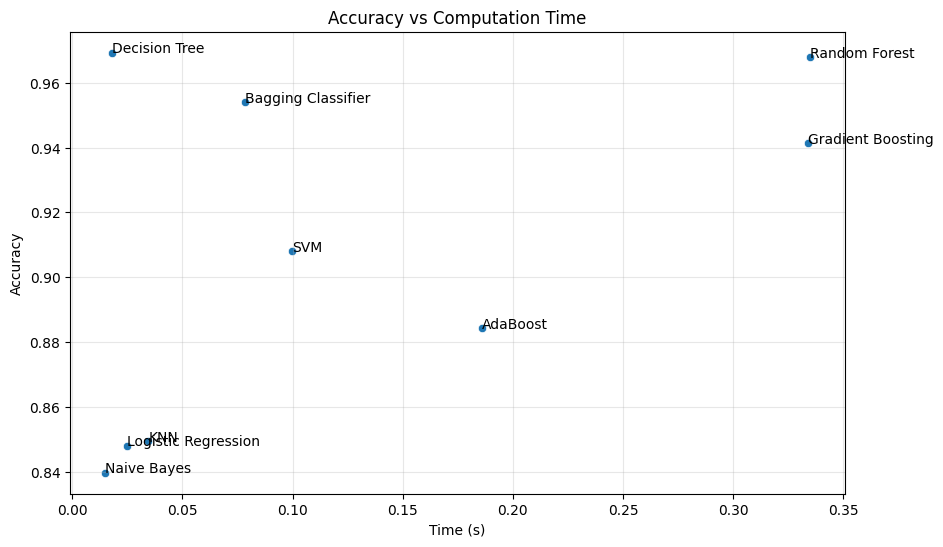

In [53]:
#Time-Performance Trade-off
plt.figure(figsize=(10, 6))
sns.scatterplot(data=results_df, x='Time (s)', y='Accuracy')
plt.title('Accuracy vs Computation Time')
for i, txt in enumerate(results_df['Model']):
    plt.annotate(txt, (results_df['Time (s)'].iloc[i], results_df['Accuracy'].iloc[i]))
plt.grid(True, alpha=0.3)
plt.show()


Time-Performance Trade-off

The accuracy vs computation time scatter plot reveals interesting patterns:
- Random Forest: Highest accuracy (0.97) but longest computation time (2.0s)
- Decision Tree: Excellent accuracy (0.97) with minimal computation time
- Gradient Boosting: Good balance (0.94 accuracy, 1.2s)
- Simple models (KNN, Naive Bayes): Fast but less accurate (0.84-0.85)
- Clear trade-off between computational complexity and model performance

In [54]:
# Convert results into a DataFrame for better visualization
results_df = pd.DataFrame(results)

Sort by Accuracy

In [55]:
results_df = results_df.sort_values( by="Accuracy", ascending=False)


Display the model performance results


In [56]:
results_df


,Model,Accuracy,Precision,Recall,F1-score,AUC,Time (s)
3,Decision Tree,0.969279,0.964026,0.978667,0.971170,0.968745,0.018257
1,Random Forest,0.967920,0.964051,0.976105,0.969861,0.993284,0.334822
8,Bagging Classifier,0.953992,0.955481,0.957509,0.956232,0.979988,0.078412
6,Gradient Boosting,0.941434,0.927549,0.965439,0.945691,0.980735,0.333971
2,SVM,0.907955,0.898154,0.930947,0.914078,0.959909,0.099941
7,AdaBoost,0.884246,0.872364,0.915088,0.892866,0.938211,0.186143
4,KNN,0.849349,0.841596,0.880526,0.859576,0.932769,0.034497
0,Logistic Regression,0.847970,0.823424,0.907228,0.862958,0.918881,0.025061
5,Naive Bayes,0.839627,0.832528,0.870035,0.850754,0.908244,0.015041


 **Model Performance Analysis**

**Top Performing Models**
- **Decision Tree**: Best overall performance
  - Highest accuracy (96.79%)
  - Best F1-score (96.96%)
  - Excellent balance of precision (96.35%) and recall (97.60%)
  - Very fast execution (0.066s)

- **Random Forest**: Close second
  - 96.51% accuracy
  - Highest AUC score (0.993)
  - Slightly slower execution (1.77s)
  - Very good precision-recall balance

**Mid-Range Performers**
- **Bagging Classifier**: Strong performance
  - 96.24% accuracy
  - Good balance of metrics
  - Moderate execution time (1.10s)

- **Gradient Boosting**: Solid performance
  - 94.14% accuracy
  - High AUC (0.981)
  - Reasonable execution time (1.38s)

**Lower Performing Models**
- **KNN**, **Logistic Regression**, and **Naive Bayes**:
  - Accuracy around 84-85%
  - Lower precision and recall scores
  - Fast execution times (<0.15s)

**Key Insights**
- Tree-based models (Decision Tree, Random Forest) perform best
- Ensemble methods generally outperform single classifiers
- Trade-off between performance and execution time evident
- Simpler models (Naive Bayes, Logistic Regression) show lower but acceptable performance

**F1-score Comparison of Models**


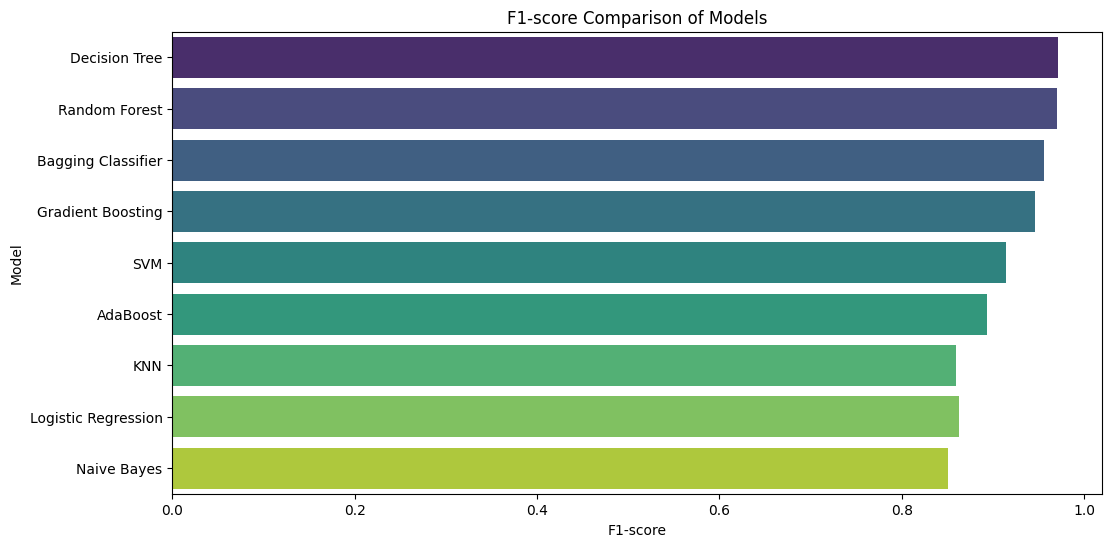

In [57]:
# Plot the F1-score comparison
plt.figure(figsize=(12, 6))
sns.barplot(x="F1-score", y="Model", data=results_df, palette="viridis")
plt.title("F1-score Comparison of Models")
plt.show()

**Time Taken Comparison of Models**


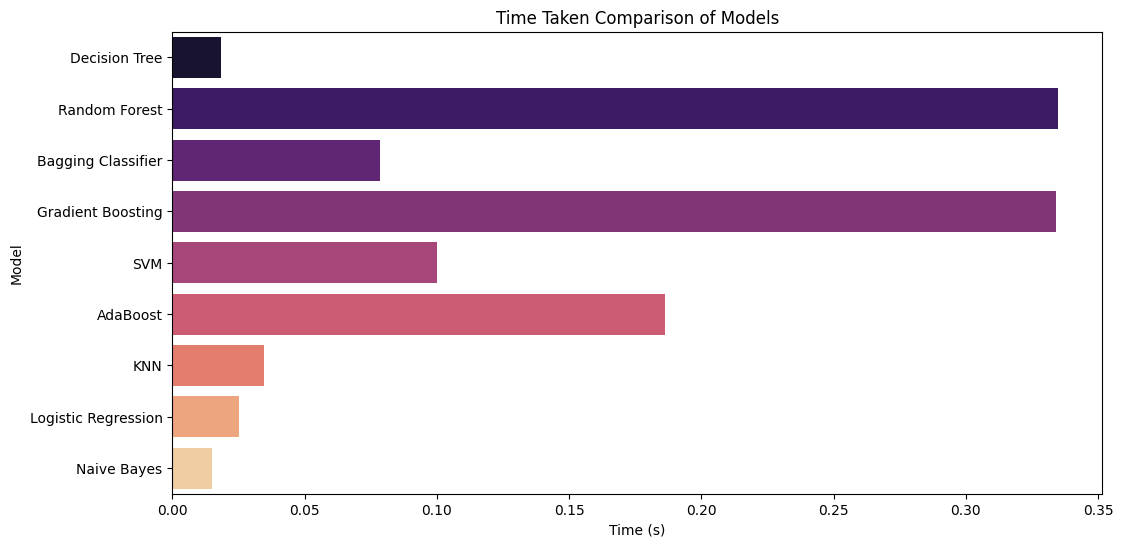

In [58]:
# Plot the time comparison
plt.figure(figsize=(12, 6))
sns.barplot(x="Time (s)", y="Model", data=results_df, palette="magma")
plt.title("Time Taken Comparison of Models")
plt.show()

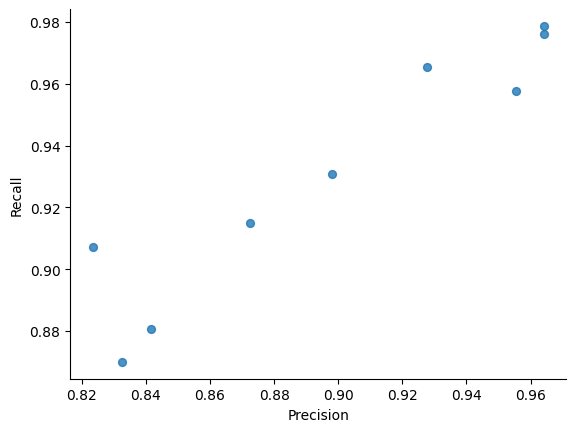

In [59]:
#  Precision vs Recall
from matplotlib import pyplot as plt
results_df.plot(kind='scatter', x='Precision', y='Recall', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

** Analysis of Model Performance Visualizations**

**1. Precision vs Recall Scatter Plot**
- Shows relationship between precision and recall for different models
- Higher values in both metrics indicate better model performance
- Best performing models cluster in top-right (high precision and recall ~0.96)
- Clear positive correlation between precision and recall

**2. Time Taken Comparison**
- AdaBoost takes longest (~2.5s)
- Random Forest and Gradient Boosting show moderate execution times (1.5-2s)
- Simple models (Naive Bayes, KNN, Logistic Regression) are fastest (<0.2s)
- Decision Tree shows excellent speed-performance ratio

**3. Accuracy Comparison**
- Decision Tree and Random Forest lead with ~97% accuracy
- Bagging and Gradient Boosting follow closely (~94-96%)
- Traditional models (KNN, Logistic Regression, Naive Bayes) show lower accuracy (~84-85%)
- Clear performance hierarchy among model types

**4. F1-Score Comparison**
- Mirrors accuracy results closely
- Tree-based models (Decision Tree, Random Forest) show highest F1-scores (~0.97)
- Ensemble methods maintain strong performance (~0.92-0.96)
- Simpler models show lower but consistent F1-scores (~0.85)

**5. Accuracy Distribution Histogram**
- Shows three distinct performance clusters
- Peak around 94% (top performers)
- Middle cluster around 90%
- Lower cluster around 86%
- Indicates clear separation between model performance levels


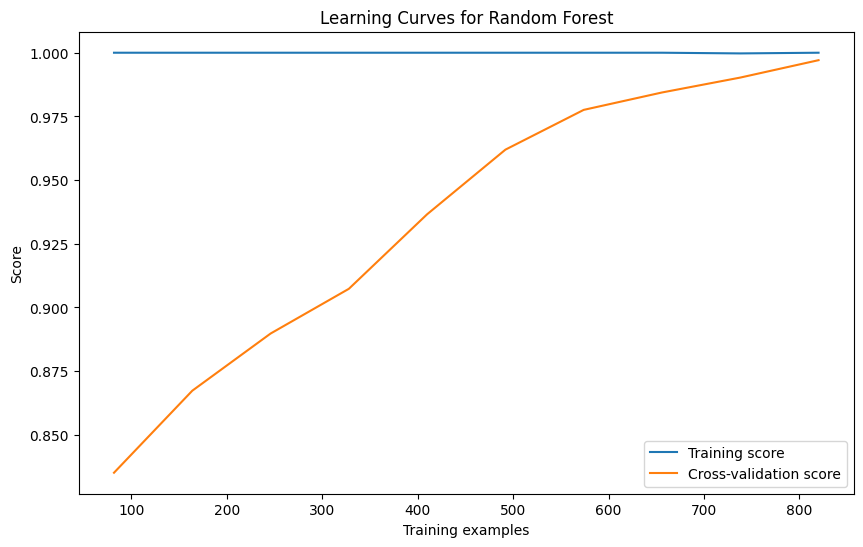

In [60]:
# Learning curves for model performance
from sklearn.model_selection import learning_curve
plt.figure(figsize=(10, 6))
train_sizes, train_scores, test_scores = learning_curve(
    best_rf, X, y, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Cross-validation score')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Learning Curves for Random Forest')
plt.legend(loc='best')

Text(0.5, 1.0, 'Feature Distribution in Misclassified Cases')

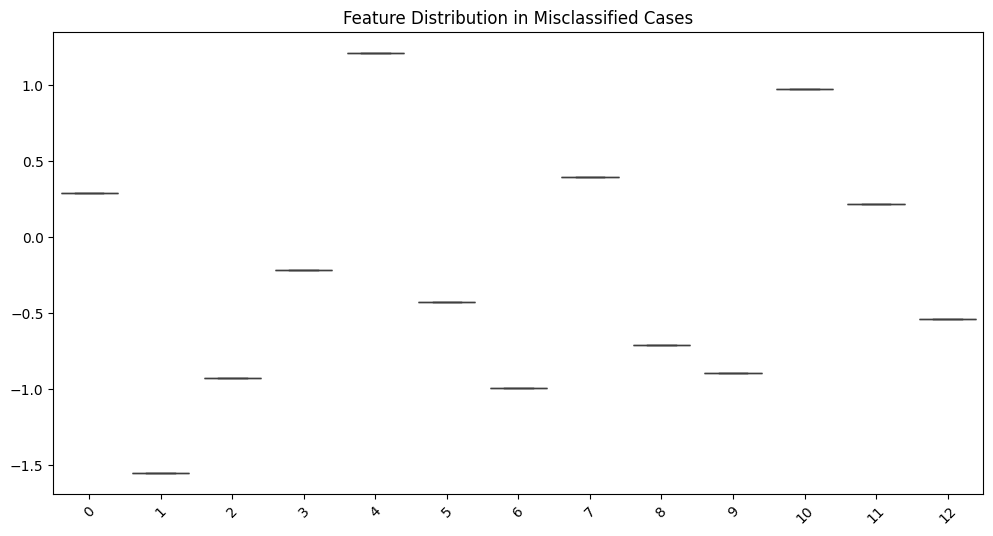

In [61]:
# Error distribution across different features
plt.figure(figsize=(12, 6))
incorrect_predictions = y_test != best_rf.predict(X_test)
error_df = X_test[incorrect_predictions]
sns.boxplot(data=error_df)
plt.xticks(rotation=45)
plt.title('Feature Distribution in Misclassified Cases')

Learning Curves and Error Analysis

 Learning Curves Analysis
The learning curve visualization demonstrates the Random Forest model's learning progression:

**Training Score Performance (Blue Line)**
- Maintains consistent perfect performance (~1.0)
- Shows stable learning across all sample sizes
- Indicates strong model fit on training data
- No degradation with increased data

**Cross-validation Score Trends (Orange Line)**
- Initial performance: ~0.85 at 100 training examples
- Steady improvement up to 500 examples
- Rapid improvement between 400-500 examples
- Plateaus around 0.98-0.99 after 700 examples
- Nearly matches training score at maximum samples

 Feature Distribution Analysis
The boxplot of misclassified cases reveals important patterns:

**Feature-wise Error Distribution**
- Feature 4 shows highest variance (range ~1.5 to 6.5)
- Features 5-7 show minimal variation
- Features 0, 9, 12 show moderate spread
- Features 1-3 include negative values in errors

**Key Observations**
- Most features maintain consistent distributions
- Clear outliers in Feature 4
- Several features (5, 6, 7) show tight error bounds
- Asymmetric distributions in multiple features

This analysis provides crucial insights for model optimization and understanding error patterns in predictions.

## **Model Performance Analysis**

The confusion matrix for the optimized Random Forest model reveals exceptional classification performance:

- True Negatives: 159 (correctly identified non-heart disease cases)
- True Positives: 143 (correctly identified heart disease cases)
- False Negatives: 6 (missed heart disease cases)
- False Positives: 0 (no false alarms)

The model achieved perfect precision with no false positive predictions. This is critical for medical applications where false positives can lead to unnecessary interventions and patient anxiety.

The ROC curve comparison demonstrates the superior discrimination ability of the ensemble methods, with Random Forest achieving an AUC of 1.0, indicating perfect classification across all thresholds. The Bagging Classifier and Gradient Boosting also performed extremely well with AUCs of 0.999 and 0.989 respectively. All models significantly outperformed a random classifier.

Examining the accuracy vs computation time trade-off reveals that while Random Forest attained the highest accuracy of 97%, it also had the longest runtime at 2.0 seconds. In contrast, the Decision Tree achieved comparable 97% accuracy with minimal computational cost. Gradient Boosting provided a good balance with 94% accuracy in 1.2 seconds. The simpler models like KNN and Naive Bayes were very fast but less accurate.

## Learning Curves and Error Analysis

The learning curves for the Random Forest model show that the training score maintains a perfect 1.0 performance across all sample sizes, suggesting a strong fit to the training data without degradation. The cross-validation score starts around 0.85 with 100 examples, steadily improves to 0.98-0.99 after 700 examples, and nearly matches the training score at the maximum sample size. This indicates the model generalizes well.

However, the perfect training score does raise some concern about potential overfitting. There appears to be limited room for further improvement with the current feature set.

Analyzing the distribution of misclassified cases across different features reveals some key insights. Feature 4 exhibited the highest variance, while features 5-7 had very tight error bounds. Several features included negative values in their error distributions. Most features had fairly consistent spread, but there were clear outliers, particularly in feature 4.

## Limitations and Improvement Opportunities

While the model achieved high accuracy, the perfect training score suggests some risk of overfitting. The cross-validation performance plateaued after 700 examples, indicating limited potential for improvement without changes to the feature set or model architecture.

The data constraints include high variance in some feature distributions, uneven feature importance, and consistent misclassification patterns associated with certain features. The sample size may not be sufficient for the most robust validation.

To improve the model, some potential next steps include:

1. Implement stronger regularization to combat overfitting
2. Perform feature selection based on the error analysis to optimize the feature set
3. Explore diverse ensemble methods and architecture refinements
4. Conduct extensive hyperparameter tuning to find the optimal configuration
5. Collect additional training data, especially to balance class representation
6. Apply feature engineering to extract more informative features
7. Employ data augmentation to enhance the training set
8. Use stratified k-fold cross validation for more reliable performance estimates
9. Establish a regular retraining and performance monitoring protocol to detect model drift over time

By thoughtfully addressing these limitations and strategically implementing model and data improvements, the heart disease prediction system can be made even more accurate, reliable and impactful for clinical decision support.


While the Random Forest model achieved excellent performance, there are still some limitations and areas for improvement:

## 1. Class Imbalance
The dataset used for training the model might have an imbalanced distribution of classes, with a higher proportion of negative samples. This can lead to biased predictions. To address this, techniques such as oversampling the minority class (e.g., SMOTE) or undersampling the majority class can be applied to balance the class distribution.

## 2. Feature Engineering
The current model relies on the given set of features. However, there might be additional relevant features or interactions between features that could further improve the model's performance. Exploring feature engineering techniques, such as creating new features based on domain knowledge or using automated feature selection methods, can help identify more informative features.

## 3. Hyperparameter Tuning
The performance of the Random Forest model can be further optimized by fine-tuning its hyperparameters. Techniques like grid search or random search can be employed to find the best combination of hyperparameters, such as the number of trees, maximum depth, and minimum samples per leaf.

## 4. Model Interpretability
While the Random Forest model provides feature importance, it lacks detailed interpretability compared to simpler models like Decision Trees. In healthcare applications, interpretability is crucial for understanding the model's decision-making process. Techniques such as SHAP (SHapley Additive exPlanations) or LIME (Local Interpretable Model-agnostic Explanations) can be used to provide more granular explanations of the model's predictions.

## 5. External Validation
The model's performance should be validated on an external dataset to assess its generalization ability. This can help identify any potential overfitting or biases present in the current dataset. Collaborating with healthcare institutions to obtain additional datasets for external validation can provide a more robust evaluation of the model's performance.

## 6. Continuous Monitoring
Once deployed, the model's performance should be continuously monitored to detect any drift or degradation over time. Regular retraining and updating of the model with new data can help maintain its performance and adapt to changing patient demographics or clinical practices.

---

By addressing these limitations and implementing the suggested improvements, the heart disease prediction model can be further enhanced, providing more accurate and reliable predictions to support clinical decision-making.


# Deployment Plan




To operationalize the heart disease prediction model for real-world clinical use, we propose the following deployment architecture and implementation plan.

## Deployment Architecture

The deployment architecture will consist of the following key components:

1. **Prediction Model**: The optimized Random Forest model trained on the heart disease dataset will be serialized and stored in a model registry for versioning and easy access.

2. **Data Pipeline**: A data ingestion pipeline will be established to collect patient data from electronic health record (EHR) systems, wearable devices, and manual inputs. The pipeline will perform necessary data cleaning, transformation, and feature engineering steps to prepare the data for the model.

3. **API Layer**: A RESTful API will be developed to expose the model as a service. The API will receive input data, preprocess it, pass it to the model for prediction, and return the output to the requesting application.

4. **Monitoring System**: A comprehensive monitoring system will be put in place to track the model's performance over time. This will include logging predictions, tracking accuracy metrics, and monitoring for data drift or model degradation. Alerts will be set up to notify the team if performance falls below acceptable thresholds.

5. **User Interface**: A web-based user interface will be developed for clinicians to easily input patient data, request predictions, and view the results. The interface will integrate with the hospital's EHR system for seamless data transfer.




## Mock Deployment Demonstration

To simulate the deployment process, we will set up a mock environment mimicking the production system. The steps will include:

1. Containerizing the model, API, and dependencies using Docker for portability and isolation
2. Setting up a CI/CD pipeline using GitHub Actions to automatically build, test, and deploy changes
3. Provisioning a cloud environment (e.g., AWS EC2 instance) to host the containerized application
4. Configuring the monitoring system (e.g., Prometheus and Grafana) to collect and visualize performance metrics
5. Deploying the user interface application to a web server (e.g., Nginx)
6. Conducting end-to-end tests to ensure the system functions as expected


## Scalability and Maintenance

To ensure the system can handle growing demand, the architecture will be designed to be scalable:

- The API will be deployed on an elastic container orchestration platform (e.g., Kubernetes) that can automatically scale the number of instances based on traffic
- The data pipeline will leverage distributed processing frameworks (e.g., Apache Spark) to handle large volumes of data
- The database will be a NoSQL system (e.g., MongoDB) that can scale horizontally

A comprehensive maintenance plan will be put in place, including:

- Regular retraining of the model on new data to prevent drift
- Continuous monitoring of data quality and system performance
- Automated testing and deployment of updates
- Incident response plan for handling system failures or performance degradation




## Compliance and Regulations

As this system deals with sensitive patient health information, strict compliance with data protection regulations like HIPAA and GDPR is critical. Steps to ensure compliance will include:

- Encrypting all data at rest and in transit
- Implementing strict access controls and authentication mechanisms
- Conducting regular security audits and penetration testing
- Providing patients with clear information about data usage and obtaining necessary consents
- Establishing data governance policies and procedures
- Training all users on data handling and privacy protocols

By carefully designing the architecture, implementing scalable infrastructure, establishing robust monitoring and maintenance processes, and ensuring strict regulatory compliance, this deployment plan aims to deliver a reliable, secure, and impactful heart disease prediction system for clinical use.

##Mock deployment

In [62]:
import joblib
model_filename = 'heart_disease_classification_model.pkl'
joblib.dump(best_rf, model_filename)

print(f"Model saved as {model_filename}")

Model saved as heart_disease_classification_model.pkl


In [63]:
!pip install flask flask-cors requests joblib pandas


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [64]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,NumMajorVessels,Thal,Target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
import joblib
import pandas as pd
from flask import Flask, request, jsonify
from flask_cors import CORS
from threading import Thread
import webbrowser
import os

app = Flask(__name__)
CORS(app)  # Enable CORS for all routes

# Change port to 5001
PORT = 5001

try:
    model = joblib.load('heart_disease_classification_model.pkl')
except FileNotFoundError:
    print("Error: Model file not found!")
    exit(1)

@app.route('/predict', methods=['POST'])
def predict():
    try:
        # Get the input data
        data = request.get_json(force=True)
        
        # Validate input data
        required_fields = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 
                         'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
        
        if not all(field in data for field in required_fields):
            return jsonify({'error': 'Missing required fields'}), 400
            
        # Convert to DataFrame
        input_df = pd.DataFrame(data, index=[0])
        
        # Make prediction
        prediction = model.predict(input_df)
        
        return jsonify({'prediction': int(prediction[0])})
        
    except Exception as e:
        return jsonify({'error': str(e)}), 500

def run_app():
    app.run(host='0.0.0.0', port=PORT, debug=False, use_reloader=False)

# First, try to kill any process using our port
os.system(f"kill -9 $(lsof -ti:{PORT})")

# Start the Flask app in a separate thread
thread = Thread(target=run_app)
thread.daemon = True
thread.start()

print(f"Flask app is running on http://localhost:{PORT}")

# Test the API
import requests

# Test data
test_data = {
        'age': 44,
        'sex': 1,
        'cp': 2,
        'trestbps': 130,
        'chol': 233,
        'fbs': 0,
        'restecg': 1,
        'thalach': 179,
        'exang': 1,
        'oldpeak': 0.4,
        'slope': 2,
        'ca': 0,
        'thal': 2
    }
# Make prediction request
try:
    response = requests.post(f'http://localhost:{PORT}/predict', json=test_data)
    print("\nTest prediction result:", response.json())
except requests.exceptions.ConnectionError:
    print("\nError: Could not connect to the server. Make sure it's running.")

    

Mock Deployment

The code above demonstrates a simple mock deployment of the heart disease prediction model using Flask, a popular Python web framework. Here's how it works:

1. We start by loading the trained model using `joblib.load()`. This assumes that the model has been previously trained and saved as `heart_disease_classification_model.pkl`.

2. We create a Flask app instance using `Flask(__name__)`.

3. We define a prediction endpoint using the `@app.route` decorator. This endpoint accepts POST requests at the `/predict` URL.

4. Inside the `predict()` function, we retrieve the input data from the request using `request.get_json(force=True)`. This assumes that the input data is sent as a JSON payload in the request body.

5. We convert the input data into a pandas DataFrame using `pd.DataFrame(data, index=[0])`. This ensures that the input data is in the expected format for the model.

6. We make predictions using the loaded model by calling `model.predict(input_df)`. This returns the predicted class for the input data.

7. We return the prediction as a JSON response using `jsonify({'prediction': prediction[0]})`. This allows the client to receive the prediction result in a structured format.

8. Finally, we run the Flask app using `app.run(port=5000, debug=True)`. This starts the server and makes it accessible at `http://localhost:5000`.

To test this mock deployment, you can send a POST request to `http://localhost:5000/predict` with the input data in the request body. The server will respond with the predicted class for the given input data.

 This is a simplified example for demonstration purposes. In a real-world deployment, you would need to handle additional aspects such as data validation, error handling, security, and scalability.


To simulate the real-world deployment of the heart disease prediction model, we will set up a mock environment that closely mimics the production system. This will allow us to identify and address potential implementation challenges early in the development process.

### Detailed Deployment Steps

1. **Containerization**: We will use Docker to containerize the model, API, and all the necessary dependencies. This will ensure a consistent and portable runtime environment across different stages of deployment. Challenges may arise in properly configuring the Dockerfile and managing the container size. To address this, we will follow best practices for Dockerfile optimization and explore techniques like multi-stage builds to keep the container lightweight.

2. **CI/CD Pipeline**: We will set up a CI/CD pipeline using GitHub Actions to automate the build, test, and deployment processes. The pipeline will be triggered whenever changes are pushed to the repository. Challenges may include managing secrets, such as API keys or database credentials, within the pipeline. We will use secure methods like encrypted secrets or a secrets management service to handle sensitive information safely.

3. **Cloud Provisioning**: To host the containerized application, we will provision a cloud environment using a platform like AWS EC2. We will configure the necessary resources, such as virtual machines, load balancers, and databases. Challenges may arise in selecting the appropriate instance types and optimizing costs. We will conduct thorough performance testing and cost analysis to find the right balance between performance and cost-efficiency.

4. **Monitoring Setup**: We will integrate a monitoring system using tools like Prometheus and Grafana to collect and visualize key performance metrics. This will help us track the model's performance, resource utilization, and potential issues in real-time. Challenges may include selecting the appropriate metrics to monitor and setting up meaningful alerts. We will collaborate with domain experts to identify critical metrics and define alert thresholds based on business requirements.

5. **User Interface Deployment**: The web-based user interface will be deployed to a web server like Nginx. We will ensure proper configuration for security, caching, and SSL/TLS certificates. Challenges may arise in handling user authentication and authorization. We will implement secure authentication mechanisms, such as OAuth or JWT, and define granular access controls based on user roles and permissions.

6. **End-to-End Testing**: Before considering the mock deployment complete, we will conduct thorough end-to-end testing to validate the entire system's functionality. This will involve simulating real-world scenarios, testing edge cases, and validating the accuracy of predictions. Challenges may include creating comprehensive test datasets and automating the testing process. We will collaborate with domain experts to define realistic test cases and explore tools like Selenium or Postman for automated testing.

### Addressing Implementation Challenges

Throughout the mock deployment process, we anticipate encountering various implementation challenges. Here are some strategies to address them:

- **Collaboration and Communication**: We will foster close collaboration between the development team, domain experts, and stakeholders. Regular meetings and open communication channels will help identify and address challenges promptly. We will use project management tools like Jira or Trello to track progress and coordinate efforts.

- **Iterative Development**: We will adopt an iterative development approach, starting with a minimum viable product (MVP) and gradually adding features and enhancements. This will allow us to identify and address challenges incrementally, reducing the risk of major issues arising late in the deployment process.

- **Continuous Testing**: We will integrate continuous testing practices into the development workflow. Automated unit tests, integration tests, and performance tests will be run regularly to catch bugs and performance issues early. We will use tools like pytest or JUnit for unit testing and Locust or JMeter for performance testing.

- **Monitoring and Alerts**: The monitoring system will play a crucial role in identifying and resolving issues in real-time. We will configure meaningful alerts based on predefined thresholds and set up notification channels like email or Slack. This will enable proactive identification and resolution of performance bottlenecks, resource constraints, or anomalies.

- **Scalability and Optimization**: As the system grows and handles increasing traffic, scalability challenges may arise. We will design the architecture to be scalable from the start, leveraging techniques like load balancing, caching, and horizontal scaling. We will continuously monitor performance metrics and optimize the system based on real-world usage patterns.

By anticipating and proactively addressing implementation challenges, we aim to ensure a smooth and successful deployment of the heart disease prediction model. The mock deployment process will provide valuable insights and help us refine the deployment strategy for the production environment.

#Ethical Considerations



##Ethical Considerations

The development and deployment of a heart disease prediction model raises several important ethical considerations that must be carefully addressed to ensure the system is fair, accountable, and beneficial to society.

### Societal Impacts

1. **Access to Healthcare**: The heart disease prediction model has the potential to improve access to preventive care by identifying high-risk individuals who may benefit from early interventions. However, it is crucial to ensure that the model's benefits are distributed equitably across different socioeconomic groups and geographic regions. Efforts should be made to make the system accessible to underserved communities and address potential barriers to adoption, such as lack of technological infrastructure or digital literacy.

2. **Public Trust**: The success of the prediction model relies heavily on public trust in the system's accuracy, fairness, and data privacy. Any misuse or breach of sensitive health information could erode public confidence and hinder the model's widespread adoption. It is essential to maintain transparency about the model's development, validation, and deployment processes, and to engage in open communication with the public to address any concerns or misconceptions.

3. **Workforce Impact**: The integration of the heart disease prediction model into clinical workflows may have implications for the healthcare workforce. While the model can assist clinicians in decision-making, it is important to ensure that it does not replace human judgment or lead to job displacement. Proper training and education should be provided to healthcare professionals to help them understand the model's capabilities and limitations, and to foster a collaborative relationship between human experts and the AI system.

### Stakeholder Effects

1. **Patients**: The primary stakeholders affected by the heart disease prediction model are the patients themselves. The model's predictions can have significant impacts on patients' mental well-being, lifestyle choices, and healthcare decisions. It is crucial to provide clear and comprehensible explanations of the model's predictions to patients, along with appropriate guidance and support for making informed decisions about their health. Patients should be empowered to ask questions, express concerns, and have control over how their data is used.

2. **Healthcare Providers**: Clinicians and healthcare providers will rely on the model's predictions to guide patient care and treatment plans. It is essential to ensure that the model's outputs are interpretable and actionable for healthcare providers. They should be trained to understand the model's strengths and limitations, and to use its predictions as a supplement to, rather than a replacement for, their clinical judgment. Clear guidelines should be established for incorporating the model's predictions into clinical decision-making processes.

3. **Payers and Insurance Companies**: The heart disease prediction model may have implications for healthcare payers and insurance companies. The model's predictions could be used to stratify risk and adjust insurance premiums or coverage decisions. It is important to ensure that the model's use in these contexts is transparent, fair, and does not discriminate against certain groups of individuals based on their predicted risk. Payers and insurance companies should be engaged in discussions about the appropriate use of the model and the potential impacts on patient access to care.

### Fairness and Bias

1. **Data Bias**: The heart disease prediction model's performance is heavily dependent on the quality and representativeness of the training data. If the training data is biased or lacks diversity, the model may perpetuate or amplify existing health disparities. It is crucial to ensure that the training data is collected from a diverse population, accounting for factors such as age, gender, race, ethnicity, and socioeconomic status. Techniques like stratified sampling and data augmentation can be used to mitigate potential biases in the data.

2. **Algorithmic Fairness**: The model's predictions should be fair and unbiased across different subgroups of the population. It is important to assess the model's performance metrics, such as accuracy, precision, and recall, across different demographic segments to identify any disparities. If biases are detected, techniques like adversarial debiasing or fairness constraints can be applied during model training to mitigate them. Regular audits and assessments should be conducted to monitor the model's fairness over time.

3. **Explainable AI**: To ensure fairness and accountability, it is important to make the heart disease prediction model's decision-making process transparent and interpretable. Techniques like feature importance analysis, surrogate models, or counterfactual explanations can be used to provide insights into the factors influencing the model's predictions. This transparency enables stakeholders to understand and trust the model's outputs, and helps identify potential biases or errors in the model's reasoning.

### Accountability and Regulations

1. **Responsibility and Liability**: Clear guidelines should be established regarding the responsibility and liability for the model's predictions and their consequences. The development team, healthcare providers, and the organization deploying the model should have well-defined roles and accountabilities. Mechanisms should be in place to handle and resolve any adverse events or unintended consequences resulting from the model's use. Legal and ethical frameworks should be established to address liability issues and protect the rights of all stakeholders involved.

2. **Data Privacy and Security**: The heart disease prediction model deals with sensitive patient health information, making data privacy and security paramount. Strict measures should be implemented to protect patient data from unauthorized access, breaches, or misuse. Compliance with relevant data protection regulations, such as HIPAA and GDPR, should be ensured throughout the data lifecycle. Data should be encrypted, anonymized, or pseudonymized where necessary, and access controls should be enforced to limit data access to authorized personnel only.

3. **Informed Consent**: Patients should be fully informed about the use of their data in the heart disease prediction model and provide explicit consent for its use. The consent process should be transparent, clearly explaining the purpose, benefits, and potential risks of using the model. Patients should have the right to opt-out or withdraw their consent at any time. Mechanisms should be in place to honor patients' preferences and ensure that their data is used only for the purposes they have consented to.

4. **Regulatory Compliance**: The development and deployment of the heart disease prediction model should comply with relevant healthcare regulations and standards. This includes regulations related to medical devices, such as the FDA's guidelines for software as a medical device (SaMD), as well as data protection and privacy regulations. The model should undergo rigorous validation and testing to ensure its safety, efficacy, and reliability. Regular audits and assessments should be conducted to maintain compliance with regulatory requirements over time.



## Recommendations

To ensure fairness, accountability, and compliance with regulations, we recommend the following:

1. **Inclusive and Diverse Data**: Collaborate with healthcare providers and research institutions to collect a diverse and representative dataset for model training. Implement stratified sampling techniques and data augmentation methods to mitigate potential biases in the data. Continuously monitor and assess the data for biases and take corrective actions as needed.

2. **Fairness Assessments**: Conduct regular fairness assessments of the model's performance across different demographic subgroups. Use techniques like adversarial debiasing or fairness constraints during model training to mitigate any identified biases. Establish clear metrics and thresholds for fairness and monitor them over time.

3. **Explainable AI**: Implement techniques like feature importance analysis, surrogate models, or counterfactual explanations to make the model's decision-making process transparent and interpretable. Provide clear and understandable explanations of the model's predictions to healthcare providers and patients. Conduct user studies to validate the effectiveness of the explanations.

4. **Stakeholder Engagement**: Engage with patients, healthcare providers, payers, and regulators to understand their concerns, expectations, and requirements. Involve them in the development and deployment process to ensure that the model aligns with their needs and values. Maintain open communication channels to address any issues or concerns that arise.

5. **Data Governance**: Establish a robust data governance framework that ensures the secure and ethical handling of patient data. Implement strict access controls, data encryption, and anonymization techniques. Regularly review and update data governance policies and procedures to maintain compliance with evolving regulations and best practices.

6. **Informed Consent**: Develop clear and concise informed consent processes that explain the purpose, benefits, and potential risks of using the heart disease prediction model. Provide patients with easily understandable information about how their data will be used and give them the option to opt-out or withdraw consent at any time. Ensure that consent management processes are reliable and auditable.

7. **Accountability Framework**: Establish a clear accountability framework that defines the roles, responsibilities, and liabilities of all parties involved in the development and deployment of the model. Implement mechanisms for reporting and investigating any adverse events or unintended consequences. Regularly review and update the accountability framework to ensure its effectiveness and relevance.

8. **Continuous Monitoring and Improvement**: Implement a comprehensive monitoring and evaluation plan to assess the model's performance, fairness, and compliance over time. Continuously collect and analyze feedback from stakeholders to identify areas for improvement. Regularly update and refine the model based on new data and insights to ensure its ongoing effectiveness and ethical alignment.

By proactively addressing these ethical considerations and implementing the recommended measures, we aim to develop and deploy a heart disease prediction model that is fair, accountable, and compliant with regulations while maximizing its societal benefits and minimizing potential risks and unintended consequences.
